MLP快速搭建非线性二分类模型task：
基于task1_data数据，建立mlp模型，实现非线性边界二分类。

1、数据分离:test_size=0.2, random_state=0；
2、建模并训练模型（迭代1000次），计算训练集、测试集准确率；
3、可视化预测结果
4、继续迭代6000次，重复步骤2-3
5、迭代1-10000次（500为间隔），查看迭代过程中的变化(可视化结果、准确率）
模型结构：一层隐藏层，25个神经元，激活函数：sigmoid
拓展任务：建立实现非线性边界分类的逻辑回归模型，尝试完成课程数据分类，并和MLP模型结果进行对比

In [19]:
# 依赖导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
# 加载数据
data = pd.read_csv("task1_data.csv")
data.head()

,x1,x2,y
0,46.4663,63.4143,1
1,43.5724,61.4890,1
2,41.4073,57.8710,1
3,40.4504,54.0086,1
4,37.3039,56.6732,1


In [3]:
# x,y数据赋值
x = data.drop(["y"], axis=1)
y = data.loc[:, "y"]

In [4]:
x.head()

,x1,x2
0,46.4663,63.4143
1,43.5724,61.4890
2,41.4073,57.8710
3,40.4504,54.0086
4,37.3039,56.6732


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

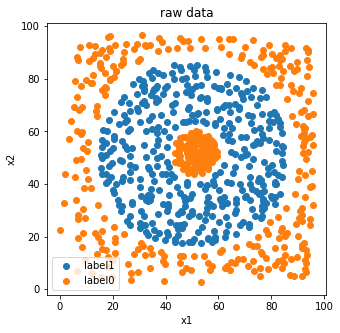

In [6]:
# 数据可视化
plt.figure(figsize=(5,5))
label1 = plt.scatter(data.loc[:, "x1"][y==1], data.loc[:, "x2"][y==1])
label0 = plt.scatter(data.loc[:, "x1"][y==0], data.loc[:, "x2"][y==0])
plt.legend((label1,label0),("label1", "label0"))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("raw data")
plt.show()

In [7]:
# 数据拆分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, x.shape)

(630, 2) (158, 2) (788, 2)


In [24]:
# 模型建立
mlp = Sequential()
mlp.add(Dense(units=25, input_dim=2, activation="sigmoid"))
mlp.add(Dense(units=1, activation="sigmoid"))
mlp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 模型求解参数配置
mlp.compile(optimizer="adam", loss="binary_crossentropy")

In [26]:
mlp.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
630/630 [==============================] - 0s 180us/step - loss: 0.7481
Epoch 2/1000
630/630 [==============================] - 0s 31us/step - loss: 0.7124
Epoch 3/1000
630/630 [==============================] - 0s 29us/step - loss: 0.6832
Epoch 4/1000
630/630 [==============================] - 0s 32us/step - loss: 0.6524
Epoch 5/1000
630/630 [==============================] - 0s 30us/step - loss: 0.6338
Epoch 6/1000
630/630 [==============================] - 0s 29us/step - loss: 0.6187
Epoch 7/1000
630/630 [==============================] - 0s 30us/step - loss: 0.6070
Epoch 8/1000
630/630 [==============================] - 0s 28us/step - loss: 0.5994
Epoch 9/1000
630/630 [==============================] - 0s 26us/step - loss: 0.5935
Epoch 10/1000
630/630 [==============================] - 0s 29us/step - loss: 0.5854
Epoch 11/1000
630/630 [==============================] - 0s 27us/step - loss: 0.5749
Epoch 12/1000
630/630 [==============================] - 0s 32us/step - l

630/630 [==============================] - 0s 29us/step - loss: 0.4678
Epoch 98/1000
630/630 [==============================] - 0s 33us/step - loss: 0.4673
Epoch 99/1000
630/630 [==============================] - 0s 28us/step - loss: 0.4670
Epoch 100/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4667
Epoch 101/1000
630/630 [==============================] - 0s 27us/step - loss: 0.4665
Epoch 102/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4656
Epoch 103/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4671
Epoch 104/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4664
Epoch 105/1000
630/630 [==============================] - 0s 27us/step - loss: 0.4658
Epoch 106/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4660
Epoch 107/1000
630/630 [==============================] - 0s 28us/step - loss: 0.4667
Epoch 108/1000
630/630 [==============================] - 0s 27us/step 

630/630 [==============================] - 0s 26us/step - loss: 0.4545
Epoch 193/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4541
Epoch 194/1000
630/630 [==============================] - 0s 24us/step - loss: 0.4539
Epoch 195/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4535
Epoch 196/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4554
Epoch 197/1000
630/630 [==============================] - 0s 24us/step - loss: 0.4532
Epoch 198/1000
630/630 [==============================] - 0s 24us/step - loss: 0.4537
Epoch 199/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4531
Epoch 200/1000
630/630 [==============================] - 0s 30us/step - loss: 0.4537
Epoch 201/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4538
Epoch 202/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4522
Epoch 203/1000
630/630 [==============================] - 0s 25us/ste

630/630 [==============================] - 0s 27us/step - loss: 0.4452
Epoch 288/1000
630/630 [==============================] - 0s 27us/step - loss: 0.4450
Epoch 289/1000
630/630 [==============================] - 0s 29us/step - loss: 0.4446
Epoch 290/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4439
Epoch 291/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4446
Epoch 292/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4445
Epoch 293/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4440
Epoch 294/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4443
Epoch 295/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4433
Epoch 296/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4439
Epoch 297/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4438
Epoch 298/1000
630/630 [==============================] - 0s 25us/ste

630/630 [==============================] - 0s 25us/step - loss: 0.4378
Epoch 383/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4364
Epoch 384/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4363
Epoch 385/1000
630/630 [==============================] - 0s 24us/step - loss: 0.4359
Epoch 386/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4369
Epoch 387/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4367
Epoch 388/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4359
Epoch 389/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4365
Epoch 390/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4360
Epoch 391/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4364
Epoch 392/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4361
Epoch 393/1000
630/630 [==============================] - 0s 25us/ste

630/630 [==============================] - 0s 26us/step - loss: 0.4306
Epoch 478/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4301
Epoch 479/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4305
Epoch 480/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4299
Epoch 481/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4299
Epoch 482/1000
630/630 [==============================] - 0s 24us/step - loss: 0.4305
Epoch 483/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4304
Epoch 484/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4295
Epoch 485/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4294
Epoch 486/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4293
Epoch 487/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4298
Epoch 488/1000
630/630 [==============================] - 0s 24us/ste

630/630 [==============================] - 0s 25us/step - loss: 0.4240
Epoch 573/1000
630/630 [==============================] - 0s 27us/step - loss: 0.4243
Epoch 574/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4257
Epoch 575/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4244
Epoch 576/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4239
Epoch 577/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4235
Epoch 578/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4239
Epoch 579/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4250
Epoch 580/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4239
Epoch 581/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4236
Epoch 582/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4234
Epoch 583/1000
630/630 [==============================] - 0s 26us/ste

630/630 [==============================] - 0s 27us/step - loss: 0.4188
Epoch 668/1000
630/630 [==============================] - 0s 28us/step - loss: 0.4185
Epoch 669/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4181
Epoch 670/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4192
Epoch 671/1000
630/630 [==============================] - 0s 27us/step - loss: 0.4185
Epoch 672/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4183
Epoch 673/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4185
Epoch 674/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4177
Epoch 675/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4178
Epoch 676/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4174
Epoch 677/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4194
Epoch 678/1000
630/630 [==============================] - 0s 27us/ste

630/630 [==============================] - 0s 26us/step - loss: 0.4146
Epoch 763/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4134
Epoch 764/1000
630/630 [==============================] - 0s 24us/step - loss: 0.4137
Epoch 765/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4143
Epoch 766/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4128
Epoch 767/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4133
Epoch 768/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4144
Epoch 769/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4126
Epoch 770/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4130
Epoch 771/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4137
Epoch 772/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4133
Epoch 773/1000
630/630 [==============================] - 0s 26us/ste

630/630 [==============================] - 0s 27us/step - loss: 0.4096
Epoch 858/1000
630/630 [==============================] - 0s 27us/step - loss: 0.4106
Epoch 859/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4113
Epoch 860/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4101
Epoch 861/1000
630/630 [==============================] - 0s 27us/step - loss: 0.4096
Epoch 862/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4098
Epoch 863/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4097
Epoch 864/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4086
Epoch 865/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4092
Epoch 866/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4102
Epoch 867/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4102
Epoch 868/1000
630/630 [==============================] - 0s 25us/ste

630/630 [==============================] - 0s 27us/step - loss: 0.4047
Epoch 953/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4056
Epoch 954/1000
630/630 [==============================] - 0s 26us/step - loss: 0.4051
Epoch 955/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4041
Epoch 956/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4050
Epoch 957/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4046
Epoch 958/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4050
Epoch 959/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4055
Epoch 960/1000
630/630 [==============================] - 0s 27us/step - loss: 0.4056
Epoch 961/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4047
Epoch 962/1000
630/630 [==============================] - 0s 25us/step - loss: 0.4045
Epoch 963/1000
630/630 [==============================] - 0s 26us/ste

In [29]:
# 训练集表现评估
y_train_predict = mlp.predict_classes(x_train)
accuracy_score(y_train, y_train_predict)

0.8253968253968254

In [32]:
# 测试集表现评估
y_test_predict = mlp.predict_classes(x_test)
accuracy_score(y_test, y_test_predict)

0.7784810126582279

In [50]:
#生成新的数据点用于画出决策边界
xx, yy = np.meshgrid(np.arange(0,100,1),np.arange(0,100,1))
x_range = np.c_[xx.ravel(),yy.ravel()]
y_range_predict = mlp.predict_classes(x_range)

In [59]:
#预测结果数据类型转化
y_range_predict_format = pd.Series(y_range_predict.ravel())

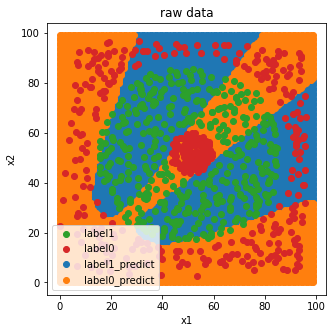

In [65]:
#数据可视化
plt.figure(figsize=(5, 5))
label1_predict = plt.scatter(x_range[:,0][y_range_predict_format==1],x_range[:,1][y_range_predict_format==1])
label0_predict = plt.scatter(x_range[:,0][y_range_predict_format==0],x_range[:,1][y_range_predict_format==0])

label1 = plt.scatter(data.loc[:, "x1"][y==1], data.loc[:, "x2"][y==1])
label0 = plt.scatter(data.loc[:, "x1"][y==0], data.loc[:, "x2"][y==0])
plt.legend((label1,label0,label1_predict,label0_predict),('label1','label0','label1_predict','label0_predict'))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("raw data")
plt.show()

Epoch 1/1
630/630 [==============================] - 0s 39us/step - loss: 0.4014


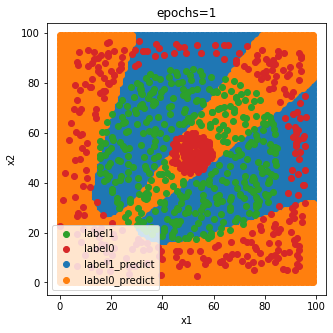

Epoch 1/500
630/630 [==============================] - 0s 32us/step - loss: 0.4002
Epoch 2/500
630/630 [==============================] - 0s 32us/step - loss: 0.4005
Epoch 3/500
630/630 [==============================] - 0s 27us/step - loss: 0.4013
Epoch 4/500
630/630 [==============================] - 0s 33us/step - loss: 0.3994
Epoch 5/500
630/630 [==============================] - 0s 35us/step - loss: 0.4010
Epoch 6/500
630/630 [==============================] - 0s 32us/step - loss: 0.4010
Epoch 7/500
630/630 [==============================] - 0s 29us/step - loss: 0.4001
Epoch 8/500
630/630 [==============================] - 0s 31us/step - loss: 0.4000
Epoch 9/500
630/630 [==============================] - 0s 35us/step - loss: 0.3993
Epoch 10/500
630/630 [==============================] - 0s 33us/step - loss: 0.3996
Epoch 11/500
630/630 [==============================] - 0s 28us/step - loss: 0.3994
Epoch 12/500
630/630 [==============================] - 0s 35us/step - loss: 0.3997
E

630/630 [==============================] - 0s 27us/step - loss: 0.3898
Epoch 99/500
630/630 [==============================] - 0s 29us/step - loss: 0.3884
Epoch 100/500
630/630 [==============================] - 0s 27us/step - loss: 0.3890
Epoch 101/500
630/630 [==============================] - 0s 26us/step - loss: 0.3893
Epoch 102/500
630/630 [==============================] - 0s 26us/step - loss: 0.3894
Epoch 103/500
630/630 [==============================] - 0s 27us/step - loss: 0.3885
Epoch 104/500
630/630 [==============================] - 0s 26us/step - loss: 0.3887
Epoch 105/500
630/630 [==============================] - 0s 25us/step - loss: 0.3878
Epoch 106/500
630/630 [==============================] - 0s 25us/step - loss: 0.3892
Epoch 107/500
630/630 [==============================] - 0s 26us/step - loss: 0.3897
Epoch 108/500
630/630 [==============================] - 0s 26us/step - loss: 0.3896
Epoch 109/500
630/630 [==============================] - 0s 26us/step - loss: 0.

630/630 [==============================] - 0s 29us/step - loss: 0.3794
Epoch 195/500
630/630 [==============================] - 0s 30us/step - loss: 0.3799
Epoch 196/500
630/630 [==============================] - 0s 29us/step - loss: 0.3798
Epoch 197/500
630/630 [==============================] - 0s 28us/step - loss: 0.3794
Epoch 198/500
630/630 [==============================] - 0s 28us/step - loss: 0.3792
Epoch 199/500
630/630 [==============================] - 0s 28us/step - loss: 0.3801
Epoch 200/500
630/630 [==============================] - 0s 27us/step - loss: 0.3790
Epoch 201/500
630/630 [==============================] - 0s 28us/step - loss: 0.3795
Epoch 202/500
630/630 [==============================] - 0s 29us/step - loss: 0.3805
Epoch 203/500
630/630 [==============================] - 0s 28us/step - loss: 0.3815
Epoch 204/500
630/630 [==============================] - 0s 28us/step - loss: 0.3809
Epoch 205/500
630/630 [==============================] - 0s 29us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.3698
Epoch 291/500
630/630 [==============================] - 0s 25us/step - loss: 0.3697
Epoch 292/500
630/630 [==============================] - 0s 25us/step - loss: 0.3701
Epoch 293/500
630/630 [==============================] - 0s 25us/step - loss: 0.3701
Epoch 294/500
630/630 [==============================] - 0s 25us/step - loss: 0.3701
Epoch 295/500
630/630 [==============================] - 0s 26us/step - loss: 0.3698
Epoch 296/500
630/630 [==============================] - 0s 24us/step - loss: 0.3697
Epoch 297/500
630/630 [==============================] - 0s 24us/step - loss: 0.3685
Epoch 298/500
630/630 [==============================] - 0s 25us/step - loss: 0.3681
Epoch 299/500
630/630 [==============================] - 0s 24us/step - loss: 0.3698
Epoch 300/500
630/630 [==============================] - 0s 25us/step - loss: 0.3694
Epoch 301/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.3571
Epoch 387/500
630/630 [==============================] - 0s 25us/step - loss: 0.3581
Epoch 388/500
630/630 [==============================] - 0s 25us/step - loss: 0.3593
Epoch 389/500
630/630 [==============================] - 0s 26us/step - loss: 0.3564
Epoch 390/500
630/630 [==============================] - 0s 25us/step - loss: 0.3582
Epoch 391/500
630/630 [==============================] - 0s 26us/step - loss: 0.3580
Epoch 392/500
630/630 [==============================] - 0s 26us/step - loss: 0.3565
Epoch 393/500
630/630 [==============================] - 0s 26us/step - loss: 0.3575
Epoch 394/500
630/630 [==============================] - 0s 25us/step - loss: 0.3577
Epoch 395/500
630/630 [==============================] - 0s 24us/step - loss: 0.3570
Epoch 396/500
630/630 [==============================] - 0s 24us/step - loss: 0.3568
Epoch 397/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.3478
Epoch 483/500
630/630 [==============================] - 0s 25us/step - loss: 0.3472
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.3479
Epoch 485/500
630/630 [==============================] - 0s 24us/step - loss: 0.3470
Epoch 486/500
630/630 [==============================] - 0s 24us/step - loss: 0.3488
Epoch 487/500
630/630 [==============================] - 0s 24us/step - loss: 0.3479
Epoch 488/500
630/630 [==============================] - 0s 26us/step - loss: 0.3479
Epoch 489/500
630/630 [==============================] - 0s 24us/step - loss: 0.3460
Epoch 490/500
630/630 [==============================] - 0s 24us/step - loss: 0.3473
Epoch 491/500
630/630 [==============================] - 0s 24us/step - loss: 0.3462
Epoch 492/500
630/630 [==============================] - 0s 25us/step - loss: 0.3465
Epoch 493/500
630/630 [==============================] - 0s 26us/step - loss: 0

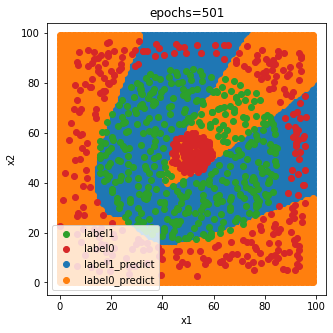

Epoch 1/500
630/630 [==============================] - 0s 28us/step - loss: 0.3452
Epoch 2/500
630/630 [==============================] - 0s 27us/step - loss: 0.3456
Epoch 3/500
630/630 [==============================] - 0s 29us/step - loss: 0.3451
Epoch 4/500
630/630 [==============================] - 0s 25us/step - loss: 0.3479
Epoch 5/500
630/630 [==============================] - 0s 29us/step - loss: 0.3456
Epoch 6/500
630/630 [==============================] - 0s 28us/step - loss: 0.3448
Epoch 7/500
630/630 [==============================] - 0s 25us/step - loss: 0.3458
Epoch 8/500
630/630 [==============================] - 0s 25us/step - loss: 0.3441
Epoch 9/500
630/630 [==============================] - 0s 25us/step - loss: 0.3455
Epoch 10/500
630/630 [==============================] - 0s 24us/step - loss: 0.3454
Epoch 11/500
630/630 [==============================] - 0s 24us/step - loss: 0.3444
Epoch 12/500
630/630 [==============================] - 0s 25us/step - loss: 0.3437
E

630/630 [==============================] - 0s 27us/step - loss: 0.3385
Epoch 99/500
630/630 [==============================] - 0s 27us/step - loss: 0.3370
Epoch 100/500
630/630 [==============================] - 0s 26us/step - loss: 0.3379
Epoch 101/500
630/630 [==============================] - 0s 27us/step - loss: 0.3383
Epoch 102/500
630/630 [==============================] - 0s 27us/step - loss: 0.3362
Epoch 103/500
630/630 [==============================] - 0s 25us/step - loss: 0.3374
Epoch 104/500
630/630 [==============================] - 0s 26us/step - loss: 0.3366
Epoch 105/500
630/630 [==============================] - 0s 25us/step - loss: 0.3370
Epoch 106/500
630/630 [==============================] - 0s 26us/step - loss: 0.3358
Epoch 107/500
630/630 [==============================] - 0s 29us/step - loss: 0.3373
Epoch 108/500
630/630 [==============================] - 0s 27us/step - loss: 0.3365
Epoch 109/500
630/630 [==============================] - 0s 26us/step - loss: 0.

630/630 [==============================] - 0s 24us/step - loss: 0.3290
Epoch 195/500
630/630 [==============================] - 0s 24us/step - loss: 0.3289
Epoch 196/500
630/630 [==============================] - 0s 24us/step - loss: 0.3292
Epoch 197/500
630/630 [==============================] - 0s 24us/step - loss: 0.3291
Epoch 198/500
630/630 [==============================] - 0s 23us/step - loss: 0.3285
Epoch 199/500
630/630 [==============================] - 0s 25us/step - loss: 0.3277
Epoch 200/500
630/630 [==============================] - 0s 24us/step - loss: 0.3283
Epoch 201/500
630/630 [==============================] - 0s 25us/step - loss: 0.3287
Epoch 202/500
630/630 [==============================] - 0s 24us/step - loss: 0.3291
Epoch 203/500
630/630 [==============================] - 0s 26us/step - loss: 0.3276
Epoch 204/500
630/630 [==============================] - 0s 35us/step - loss: 0.3280
Epoch 205/500
630/630 [==============================] - 0s 31us/step - loss: 0

630/630 [==============================] - 0s 25us/step - loss: 0.3225
Epoch 291/500
630/630 [==============================] - 0s 24us/step - loss: 0.3226
Epoch 292/500
630/630 [==============================] - 0s 25us/step - loss: 0.3211
Epoch 293/500
630/630 [==============================] - 0s 24us/step - loss: 0.3210
Epoch 294/500
630/630 [==============================] - 0s 24us/step - loss: 0.3217
Epoch 295/500
630/630 [==============================] - 0s 24us/step - loss: 0.3222
Epoch 296/500
630/630 [==============================] - 0s 24us/step - loss: 0.3227
Epoch 297/500
630/630 [==============================] - 0s 24us/step - loss: 0.3215
Epoch 298/500
630/630 [==============================] - 0s 24us/step - loss: 0.3223
Epoch 299/500
630/630 [==============================] - 0s 23us/step - loss: 0.3210
Epoch 300/500
630/630 [==============================] - 0s 24us/step - loss: 0.3208
Epoch 301/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.3177
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.3152
Epoch 388/500
630/630 [==============================] - 0s 23us/step - loss: 0.3147
Epoch 389/500
630/630 [==============================] - 0s 23us/step - loss: 0.3144
Epoch 390/500
630/630 [==============================] - 0s 23us/step - loss: 0.3169
Epoch 391/500
630/630 [==============================] - 0s 26us/step - loss: 0.3142
Epoch 392/500
630/630 [==============================] - 0s 28us/step - loss: 0.3146
Epoch 393/500
630/630 [==============================] - 0s 29us/step - loss: 0.3156
Epoch 394/500
630/630 [==============================] - 0s 27us/step - loss: 0.3159
Epoch 395/500
630/630 [==============================] - 0s 28us/step - loss: 0.3151
Epoch 396/500
630/630 [==============================] - 0s 32us/step - loss: 0.3149
Epoch 397/500
630/630 [==============================] - 0s 27us/step - loss: 0

630/630 [==============================] - 0s 30us/step - loss: 0.3081
Epoch 483/500
630/630 [==============================] - 0s 28us/step - loss: 0.3105
Epoch 484/500
630/630 [==============================] - 0s 32us/step - loss: 0.3088
Epoch 485/500
630/630 [==============================] - 0s 27us/step - loss: 0.3093
Epoch 486/500
630/630 [==============================] - 0s 23us/step - loss: 0.3084
Epoch 487/500
630/630 [==============================] - 0s 23us/step - loss: 0.3092
Epoch 488/500
630/630 [==============================] - 0s 23us/step - loss: 0.3098
Epoch 489/500
630/630 [==============================] - 0s 23us/step - loss: 0.3088
Epoch 490/500
630/630 [==============================] - 0s 25us/step - loss: 0.3087
Epoch 491/500
630/630 [==============================] - 0s 25us/step - loss: 0.3091
Epoch 492/500
630/630 [==============================] - 0s 28us/step - loss: 0.3091
Epoch 493/500
630/630 [==============================] - 0s 26us/step - loss: 0

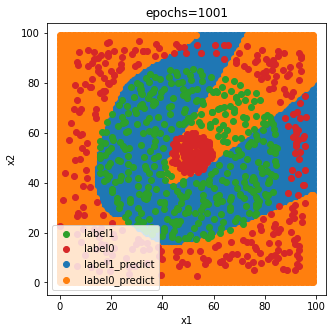

Epoch 1/500
630/630 [==============================] - 0s 27us/step - loss: 0.3089
Epoch 2/500
630/630 [==============================] - 0s 24us/step - loss: 0.3106
Epoch 3/500
630/630 [==============================] - 0s 23us/step - loss: 0.3091
Epoch 4/500
630/630 [==============================] - 0s 23us/step - loss: 0.3087
Epoch 5/500
630/630 [==============================] - 0s 23us/step - loss: 0.3103
Epoch 6/500
630/630 [==============================] - 0s 23us/step - loss: 0.3079
Epoch 7/500
630/630 [==============================] - 0s 23us/step - loss: 0.3071
Epoch 8/500
630/630 [==============================] - 0s 26us/step - loss: 0.3081
Epoch 9/500
630/630 [==============================] - 0s 32us/step - loss: 0.3082
Epoch 10/500
630/630 [==============================] - 0s 32us/step - loss: 0.3074
Epoch 11/500
630/630 [==============================] - 0s 25us/step - loss: 0.3082
Epoch 12/500
630/630 [==============================] - 0s 24us/step - loss: 0.3112
E

630/630 [==============================] - 0s 23us/step - loss: 0.3026
Epoch 99/500
630/630 [==============================] - 0s 23us/step - loss: 0.3030
Epoch 100/500
630/630 [==============================] - 0s 23us/step - loss: 0.3029
Epoch 101/500
630/630 [==============================] - 0s 24us/step - loss: 0.3024
Epoch 102/500
630/630 [==============================] - 0s 24us/step - loss: 0.3018
Epoch 103/500
630/630 [==============================] - 0s 24us/step - loss: 0.3015
Epoch 104/500
630/630 [==============================] - 0s 27us/step - loss: 0.3031
Epoch 105/500
630/630 [==============================] - 0s 28us/step - loss: 0.3024
Epoch 106/500
630/630 [==============================] - 0s 24us/step - loss: 0.3022
Epoch 107/500
630/630 [==============================] - 0s 23us/step - loss: 0.3028
Epoch 108/500
630/630 [==============================] - 0s 25us/step - loss: 0.3042
Epoch 109/500
630/630 [==============================] - 0s 24us/step - loss: 0.

630/630 [==============================] - 0s 31us/step - loss: 0.2970
Epoch 195/500
630/630 [==============================] - 0s 24us/step - loss: 0.2967
Epoch 196/500
630/630 [==============================] - 0s 28us/step - loss: 0.2971
Epoch 197/500
630/630 [==============================] - 0s 25us/step - loss: 0.2974
Epoch 198/500
630/630 [==============================] - 0s 25us/step - loss: 0.2976
Epoch 199/500
630/630 [==============================] - 0s 24us/step - loss: 0.2981
Epoch 200/500
630/630 [==============================] - 0s 39us/step - loss: 0.2976
Epoch 201/500
630/630 [==============================] - 0s 29us/step - loss: 0.2959
Epoch 202/500
630/630 [==============================] - 0s 27us/step - loss: 0.2972
Epoch 203/500
630/630 [==============================] - 0s 31us/step - loss: 0.2984
Epoch 204/500
630/630 [==============================] - 0s 34us/step - loss: 0.2972
Epoch 205/500
630/630 [==============================] - 0s 42us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.2936
Epoch 291/500
630/630 [==============================] - 0s 27us/step - loss: 0.2942
Epoch 292/500
630/630 [==============================] - 0s 24us/step - loss: 0.2959
Epoch 293/500
630/630 [==============================] - 0s 23us/step - loss: 0.2935
Epoch 294/500
630/630 [==============================] - 0s 23us/step - loss: 0.2923
Epoch 295/500
630/630 [==============================] - 0s 23us/step - loss: 0.2920
Epoch 296/500
630/630 [==============================] - 0s 23us/step - loss: 0.2956
Epoch 297/500
630/630 [==============================] - 0s 23us/step - loss: 0.2961
Epoch 298/500
630/630 [==============================] - 0s 24us/step - loss: 0.2935
Epoch 299/500
630/630 [==============================] - 0s 23us/step - loss: 0.2923
Epoch 300/500
630/630 [==============================] - 0s 23us/step - loss: 0.2924
Epoch 301/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 26us/step - loss: 0.2879
Epoch 387/500
630/630 [==============================] - 0s 28us/step - loss: 0.2886
Epoch 388/500
630/630 [==============================] - 0s 24us/step - loss: 0.2879
Epoch 389/500
630/630 [==============================] - 0s 24us/step - loss: 0.2884
Epoch 390/500
630/630 [==============================] - 0s 25us/step - loss: 0.2891
Epoch 391/500
630/630 [==============================] - 0s 26us/step - loss: 0.2887
Epoch 392/500
630/630 [==============================] - 0s 28us/step - loss: 0.2898
Epoch 393/500
630/630 [==============================] - 0s 28us/step - loss: 0.2868
Epoch 394/500
630/630 [==============================] - 0s 25us/step - loss: 0.2887
Epoch 395/500
630/630 [==============================] - 0s 25us/step - loss: 0.2876
Epoch 396/500
630/630 [==============================] - 0s 24us/step - loss: 0.2895
Epoch 397/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.2838
Epoch 483/500
630/630 [==============================] - 0s 23us/step - loss: 0.2834
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.2832
Epoch 485/500
630/630 [==============================] - 0s 23us/step - loss: 0.2854
Epoch 486/500
630/630 [==============================] - 0s 23us/step - loss: 0.2837
Epoch 487/500
630/630 [==============================] - 0s 23us/step - loss: 0.2846
Epoch 488/500
630/630 [==============================] - 0s 25us/step - loss: 0.2830
Epoch 489/500
630/630 [==============================] - 0s 25us/step - loss: 0.2849
Epoch 490/500
630/630 [==============================] - 0s 24us/step - loss: 0.2882
Epoch 491/500
630/630 [==============================] - 0s 27us/step - loss: 0.2843
Epoch 492/500
630/630 [==============================] - 0s 23us/step - loss: 0.2836
Epoch 493/500
630/630 [==============================] - 0s 25us/step - loss: 0

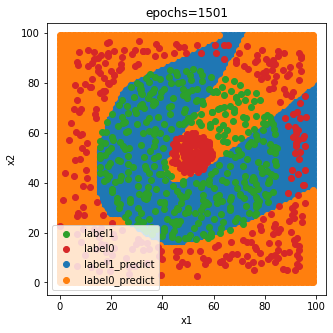

Epoch 1/500
630/630 [==============================] - 0s 29us/step - loss: 0.2824
Epoch 2/500
630/630 [==============================] - 0s 28us/step - loss: 0.2820
Epoch 3/500
630/630 [==============================] - 0s 30us/step - loss: 0.2834
Epoch 4/500
630/630 [==============================] - 0s 32us/step - loss: 0.2853
Epoch 5/500
630/630 [==============================] - 0s 31us/step - loss: 0.2816
Epoch 6/500
630/630 [==============================] - 0s 30us/step - loss: 0.2841
Epoch 7/500
630/630 [==============================] - 0s 32us/step - loss: 0.2859
Epoch 8/500
630/630 [==============================] - 0s 32us/step - loss: 0.2840
Epoch 9/500
630/630 [==============================] - 0s 30us/step - loss: 0.2834
Epoch 10/500
630/630 [==============================] - 0s 30us/step - loss: 0.2826
Epoch 11/500
630/630 [==============================] - 0s 30us/step - loss: 0.2824
Epoch 12/500
630/630 [==============================] - 0s 29us/step - loss: 0.2848
E

630/630 [==============================] - 0s 27us/step - loss: 0.2788
Epoch 99/500
630/630 [==============================] - 0s 27us/step - loss: 0.2806
Epoch 100/500
630/630 [==============================] - 0s 26us/step - loss: 0.2797
Epoch 101/500
630/630 [==============================] - 0s 27us/step - loss: 0.2804
Epoch 102/500
630/630 [==============================] - 0s 25us/step - loss: 0.2797
Epoch 103/500
630/630 [==============================] - 0s 26us/step - loss: 0.2799
Epoch 104/500
630/630 [==============================] - 0s 29us/step - loss: 0.2784
Epoch 105/500
630/630 [==============================] - 0s 28us/step - loss: 0.2793
Epoch 106/500
630/630 [==============================] - 0s 26us/step - loss: 0.2798
Epoch 107/500
630/630 [==============================] - 0s 27us/step - loss: 0.2786
Epoch 108/500
630/630 [==============================] - 0s 26us/step - loss: 0.2782
Epoch 109/500
630/630 [==============================] - 0s 27us/step - loss: 0.

630/630 [==============================] - 0s 28us/step - loss: 0.2763
Epoch 195/500
630/630 [==============================] - 0s 27us/step - loss: 0.2756
Epoch 196/500
630/630 [==============================] - 0s 28us/step - loss: 0.2764
Epoch 197/500
630/630 [==============================] - 0s 26us/step - loss: 0.2747
Epoch 198/500
630/630 [==============================] - 0s 27us/step - loss: 0.2764
Epoch 199/500
630/630 [==============================] - 0s 25us/step - loss: 0.2748
Epoch 200/500
630/630 [==============================] - 0s 30us/step - loss: 0.2749
Epoch 201/500
630/630 [==============================] - 0s 27us/step - loss: 0.2741
Epoch 202/500
630/630 [==============================] - 0s 27us/step - loss: 0.2749
Epoch 203/500
630/630 [==============================] - 0s 26us/step - loss: 0.2749
Epoch 204/500
630/630 [==============================] - 0s 26us/step - loss: 0.2761
Epoch 205/500
630/630 [==============================] - 0s 27us/step - loss: 0

630/630 [==============================] - 0s 25us/step - loss: 0.2716
Epoch 291/500
630/630 [==============================] - 0s 27us/step - loss: 0.2719
Epoch 292/500
630/630 [==============================] - 0s 26us/step - loss: 0.2718
Epoch 293/500
630/630 [==============================] - 0s 25us/step - loss: 0.2706
Epoch 294/500
630/630 [==============================] - 0s 27us/step - loss: 0.2711
Epoch 295/500
630/630 [==============================] - 0s 26us/step - loss: 0.2730
Epoch 296/500
630/630 [==============================] - 0s 26us/step - loss: 0.2741
Epoch 297/500
630/630 [==============================] - 0s 26us/step - loss: 0.2735
Epoch 298/500
630/630 [==============================] - 0s 27us/step - loss: 0.2723
Epoch 299/500
630/630 [==============================] - 0s 26us/step - loss: 0.2711
Epoch 300/500
630/630 [==============================] - 0s 26us/step - loss: 0.2703
Epoch 301/500
630/630 [==============================] - 0s 27us/step - loss: 0

630/630 [==============================] - 0s 26us/step - loss: 0.2701
Epoch 387/500
630/630 [==============================] - 0s 29us/step - loss: 0.2655
Epoch 388/500
630/630 [==============================] - 0s 26us/step - loss: 0.2652
Epoch 389/500
630/630 [==============================] - 0s 27us/step - loss: 0.2654
Epoch 390/500
630/630 [==============================] - 0s 27us/step - loss: 0.2655
Epoch 391/500
630/630 [==============================] - 0s 26us/step - loss: 0.2643
Epoch 392/500
630/630 [==============================] - 0s 27us/step - loss: 0.2652
Epoch 393/500
630/630 [==============================] - 0s 26us/step - loss: 0.2656
Epoch 394/500
630/630 [==============================] - 0s 26us/step - loss: 0.2674
Epoch 395/500
630/630 [==============================] - 0s 25us/step - loss: 0.2697
Epoch 396/500
630/630 [==============================] - 0s 26us/step - loss: 0.2646
Epoch 397/500
630/630 [==============================] - 0s 26us/step - loss: 0

630/630 [==============================] - 0s 28us/step - loss: 0.2608
Epoch 483/500
630/630 [==============================] - 0s 29us/step - loss: 0.2597
Epoch 484/500
630/630 [==============================] - 0s 26us/step - loss: 0.2610
Epoch 485/500
630/630 [==============================] - 0s 26us/step - loss: 0.2606
Epoch 486/500
630/630 [==============================] - 0s 26us/step - loss: 0.2589
Epoch 487/500
630/630 [==============================] - 0s 26us/step - loss: 0.2602
Epoch 488/500
630/630 [==============================] - 0s 26us/step - loss: 0.2599
Epoch 489/500
630/630 [==============================] - 0s 26us/step - loss: 0.2597
Epoch 490/500
630/630 [==============================] - 0s 26us/step - loss: 0.2607
Epoch 491/500
630/630 [==============================] - 0s 27us/step - loss: 0.2574
Epoch 492/500
630/630 [==============================] - 0s 27us/step - loss: 0.2594
Epoch 493/500
630/630 [==============================] - 0s 26us/step - loss: 0

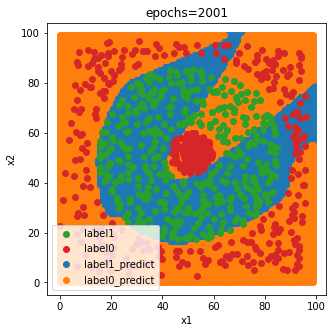

Epoch 1/500
630/630 [==============================] - 0s 29us/step - loss: 0.2577
Epoch 2/500
630/630 [==============================] - 0s 26us/step - loss: 0.2568
Epoch 3/500
630/630 [==============================] - 0s 25us/step - loss: 0.2571
Epoch 4/500
630/630 [==============================] - 0s 26us/step - loss: 0.2564
Epoch 5/500
630/630 [==============================] - 0s 27us/step - loss: 0.2565
Epoch 6/500
630/630 [==============================] - 0s 26us/step - loss: 0.2560
Epoch 7/500
630/630 [==============================] - 0s 25us/step - loss: 0.2559
Epoch 8/500
630/630 [==============================] - 0s 26us/step - loss: 0.2568
Epoch 9/500
630/630 [==============================] - 0s 25us/step - loss: 0.2598
Epoch 10/500
630/630 [==============================] - 0s 25us/step - loss: 0.2549
Epoch 11/500
630/630 [==============================] - 0s 25us/step - loss: 0.2577
Epoch 12/500
630/630 [==============================] - 0s 32us/step - loss: 0.2563
E

630/630 [==============================] - 0s 25us/step - loss: 0.2420
Epoch 99/500
630/630 [==============================] - 0s 25us/step - loss: 0.2428
Epoch 100/500
630/630 [==============================] - 0s 23us/step - loss: 0.2418
Epoch 101/500
630/630 [==============================] - 0s 22us/step - loss: 0.2444
Epoch 102/500
630/630 [==============================] - 0s 23us/step - loss: 0.2441
Epoch 103/500
630/630 [==============================] - 0s 23us/step - loss: 0.2416
Epoch 104/500
630/630 [==============================] - 0s 23us/step - loss: 0.2430
Epoch 105/500
630/630 [==============================] - 0s 24us/step - loss: 0.2441
Epoch 106/500
630/630 [==============================] - 0s 23us/step - loss: 0.2412
Epoch 107/500
630/630 [==============================] - 0s 23us/step - loss: 0.2425
Epoch 108/500
630/630 [==============================] - 0s 23us/step - loss: 0.2400
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 23us/step - loss: 0.2371
Epoch 195/500
630/630 [==============================] - 0s 23us/step - loss: 0.2406
Epoch 196/500
630/630 [==============================] - 0s 23us/step - loss: 0.2374
Epoch 197/500
630/630 [==============================] - 0s 23us/step - loss: 0.2376
Epoch 198/500
630/630 [==============================] - 0s 23us/step - loss: 0.2379
Epoch 199/500
630/630 [==============================] - 0s 23us/step - loss: 0.2372
Epoch 200/500
630/630 [==============================] - 0s 22us/step - loss: 0.2398
Epoch 201/500
630/630 [==============================] - 0s 23us/step - loss: 0.2388
Epoch 202/500
630/630 [==============================] - 0s 22us/step - loss: 0.2406
Epoch 203/500
630/630 [==============================] - 0s 23us/step - loss: 0.2358
Epoch 204/500
630/630 [==============================] - 0s 23us/step - loss: 0.2364
Epoch 205/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 22us/step - loss: 0.2346
Epoch 291/500
630/630 [==============================] - 0s 23us/step - loss: 0.2330
Epoch 292/500
630/630 [==============================] - 0s 23us/step - loss: 0.2349
Epoch 293/500
630/630 [==============================] - 0s 23us/step - loss: 0.2343
Epoch 294/500
630/630 [==============================] - 0s 23us/step - loss: 0.2319
Epoch 295/500
630/630 [==============================] - 0s 23us/step - loss: 0.2353
Epoch 296/500
630/630 [==============================] - 0s 23us/step - loss: 0.2331
Epoch 297/500
630/630 [==============================] - 0s 23us/step - loss: 0.2340
Epoch 298/500
630/630 [==============================] - 0s 23us/step - loss: 0.2341
Epoch 299/500
630/630 [==============================] - 0s 23us/step - loss: 0.2365
Epoch 300/500
630/630 [==============================] - 0s 23us/step - loss: 0.2326
Epoch 301/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.2289
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.2308
Epoch 388/500
630/630 [==============================] - 0s 23us/step - loss: 0.2309
Epoch 389/500
630/630 [==============================] - 0s 23us/step - loss: 0.2302
Epoch 390/500
630/630 [==============================] - 0s 23us/step - loss: 0.2290
Epoch 391/500
630/630 [==============================] - 0s 23us/step - loss: 0.2288
Epoch 392/500
630/630 [==============================] - 0s 23us/step - loss: 0.2316
Epoch 393/500
630/630 [==============================] - 0s 23us/step - loss: 0.2304
Epoch 394/500
630/630 [==============================] - 0s 23us/step - loss: 0.2301
Epoch 395/500
630/630 [==============================] - 0s 23us/step - loss: 0.2277
Epoch 396/500
630/630 [==============================] - 0s 23us/step - loss: 0.2293
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.2281
Epoch 483/500
630/630 [==============================] - 0s 25us/step - loss: 0.2260
Epoch 484/500
630/630 [==============================] - 0s 26us/step - loss: 0.2252
Epoch 485/500
630/630 [==============================] - 0s 24us/step - loss: 0.2253
Epoch 486/500
630/630 [==============================] - 0s 25us/step - loss: 0.2276
Epoch 487/500
630/630 [==============================] - 0s 24us/step - loss: 0.2249
Epoch 488/500
630/630 [==============================] - 0s 24us/step - loss: 0.2261
Epoch 489/500
630/630 [==============================] - 0s 23us/step - loss: 0.2253
Epoch 490/500
630/630 [==============================] - 0s 25us/step - loss: 0.2259
Epoch 491/500
630/630 [==============================] - 0s 27us/step - loss: 0.2244
Epoch 492/500
630/630 [==============================] - 0s 24us/step - loss: 0.2254
Epoch 493/500
630/630 [==============================] - 0s 24us/step - loss: 0

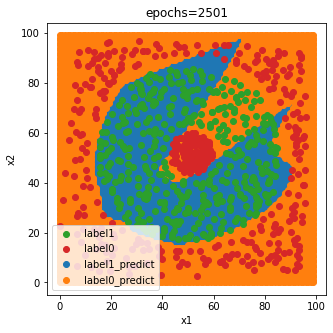

Epoch 1/500
630/630 [==============================] - 0s 28us/step - loss: 0.2251
Epoch 2/500
630/630 [==============================] - 0s 24us/step - loss: 0.2283
Epoch 3/500
630/630 [==============================] - 0s 24us/step - loss: 0.2284
Epoch 4/500
630/630 [==============================] - 0s 27us/step - loss: 0.2253
Epoch 5/500
630/630 [==============================] - 0s 26us/step - loss: 0.2238
Epoch 6/500
630/630 [==============================] - 0s 24us/step - loss: 0.2240
Epoch 7/500
630/630 [==============================] - 0s 25us/step - loss: 0.2247
Epoch 8/500
630/630 [==============================] - 0s 26us/step - loss: 0.2252
Epoch 9/500
630/630 [==============================] - 0s 25us/step - loss: 0.2254
Epoch 10/500
630/630 [==============================] - 0s 26us/step - loss: 0.2245
Epoch 11/500
630/630 [==============================] - 0s 27us/step - loss: 0.2257
Epoch 12/500
630/630 [==============================] - 0s 26us/step - loss: 0.2246
E

630/630 [==============================] - 0s 24us/step - loss: 0.2213
Epoch 99/500
630/630 [==============================] - 0s 24us/step - loss: 0.2223
Epoch 100/500
630/630 [==============================] - 0s 23us/step - loss: 0.2230
Epoch 101/500
630/630 [==============================] - 0s 24us/step - loss: 0.2214
Epoch 102/500
630/630 [==============================] - 0s 28us/step - loss: 0.2223
Epoch 103/500
630/630 [==============================] - 0s 30us/step - loss: 0.2218
Epoch 104/500
630/630 [==============================] - 0s 24us/step - loss: 0.2239
Epoch 105/500
630/630 [==============================] - 0s 23us/step - loss: 0.2227
Epoch 106/500
630/630 [==============================] - 0s 24us/step - loss: 0.2235
Epoch 107/500
630/630 [==============================] - 0s 24us/step - loss: 0.2235
Epoch 108/500
630/630 [==============================] - 0s 24us/step - loss: 0.2219
Epoch 109/500
630/630 [==============================] - 0s 24us/step - loss: 0.

630/630 [==============================] - 0s 26us/step - loss: 0.2181
Epoch 195/500
630/630 [==============================] - 0s 30us/step - loss: 0.2200
Epoch 196/500
630/630 [==============================] - 0s 38us/step - loss: 0.2197
Epoch 197/500
630/630 [==============================] - 0s 33us/step - loss: 0.2189
Epoch 198/500
630/630 [==============================] - 0s 28us/step - loss: 0.2186
Epoch 199/500
630/630 [==============================] - 0s 28us/step - loss: 0.2194
Epoch 200/500
630/630 [==============================] - 0s 38us/step - loss: 0.2179
Epoch 201/500
630/630 [==============================] - 0s 31us/step - loss: 0.2178
Epoch 202/500
630/630 [==============================] - 0s 24us/step - loss: 0.2190
Epoch 203/500
630/630 [==============================] - 0s 23us/step - loss: 0.2182
Epoch 204/500
630/630 [==============================] - 0s 23us/step - loss: 0.2192
Epoch 205/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.2169
Epoch 291/500
630/630 [==============================] - 0s 25us/step - loss: 0.2158
Epoch 292/500
630/630 [==============================] - 0s 24us/step - loss: 0.2155
Epoch 293/500
630/630 [==============================] - 0s 23us/step - loss: 0.2147
Epoch 294/500
630/630 [==============================] - 0s 25us/step - loss: 0.2155
Epoch 295/500
630/630 [==============================] - 0s 23us/step - loss: 0.2169
Epoch 296/500
630/630 [==============================] - 0s 23us/step - loss: 0.2167
Epoch 297/500
630/630 [==============================] - 0s 27us/step - loss: 0.2161
Epoch 298/500
630/630 [==============================] - 0s 23us/step - loss: 0.2157
Epoch 299/500
630/630 [==============================] - 0s 25us/step - loss: 0.2167
Epoch 300/500
630/630 [==============================] - 0s 23us/step - loss: 0.2164
Epoch 301/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 28us/step - loss: 0.2130
Epoch 387/500
630/630 [==============================] - 0s 26us/step - loss: 0.2157
Epoch 388/500
630/630 [==============================] - 0s 27us/step - loss: 0.2145
Epoch 389/500
630/630 [==============================] - 0s 26us/step - loss: 0.2122
Epoch 390/500
630/630 [==============================] - 0s 26us/step - loss: 0.2124
Epoch 391/500
630/630 [==============================] - 0s 27us/step - loss: 0.2138
Epoch 392/500
630/630 [==============================] - 0s 26us/step - loss: 0.2121
Epoch 393/500
630/630 [==============================] - 0s 26us/step - loss: 0.2143
Epoch 394/500
630/630 [==============================] - 0s 24us/step - loss: 0.2143
Epoch 395/500
630/630 [==============================] - 0s 24us/step - loss: 0.2127
Epoch 396/500
630/630 [==============================] - 0s 23us/step - loss: 0.2134
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.2095
Epoch 483/500
630/630 [==============================] - 0s 24us/step - loss: 0.2119
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.2116
Epoch 485/500
630/630 [==============================] - 0s 24us/step - loss: 0.2117
Epoch 486/500
630/630 [==============================] - 0s 24us/step - loss: 0.2128
Epoch 487/500
630/630 [==============================] - 0s 23us/step - loss: 0.2108
Epoch 488/500
630/630 [==============================] - 0s 24us/step - loss: 0.2118
Epoch 489/500
630/630 [==============================] - 0s 23us/step - loss: 0.2097
Epoch 490/500
630/630 [==============================] - 0s 24us/step - loss: 0.2109
Epoch 491/500
630/630 [==============================] - 0s 23us/step - loss: 0.2123
Epoch 492/500
630/630 [==============================] - 0s 23us/step - loss: 0.2112
Epoch 493/500
630/630 [==============================] - 0s 24us/step - loss: 0

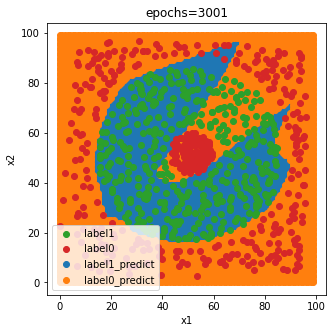

Epoch 1/500
630/630 [==============================] - 0s 27us/step - loss: 0.2115
Epoch 2/500
630/630 [==============================] - 0s 24us/step - loss: 0.2105
Epoch 3/500
630/630 [==============================] - 0s 24us/step - loss: 0.2103
Epoch 4/500
630/630 [==============================] - 0s 23us/step - loss: 0.2105
Epoch 5/500
630/630 [==============================] - 0s 24us/step - loss: 0.2101
Epoch 6/500
630/630 [==============================] - 0s 23us/step - loss: 0.2105
Epoch 7/500
630/630 [==============================] - 0s 24us/step - loss: 0.2106
Epoch 8/500
630/630 [==============================] - 0s 23us/step - loss: 0.2102
Epoch 9/500
630/630 [==============================] - 0s 23us/step - loss: 0.2105
Epoch 10/500
630/630 [==============================] - 0s 23us/step - loss: 0.2098
Epoch 11/500
630/630 [==============================] - 0s 23us/step - loss: 0.2099
Epoch 12/500
630/630 [==============================] - 0s 23us/step - loss: 0.2099
E

630/630 [==============================] - 0s 23us/step - loss: 0.2077
Epoch 99/500
630/630 [==============================] - 0s 23us/step - loss: 0.2083
Epoch 100/500
630/630 [==============================] - 0s 25us/step - loss: 0.2115
Epoch 101/500
630/630 [==============================] - 0s 24us/step - loss: 0.2086
Epoch 102/500
630/630 [==============================] - 0s 23us/step - loss: 0.2080
Epoch 103/500
630/630 [==============================] - 0s 25us/step - loss: 0.2067
Epoch 104/500
630/630 [==============================] - 0s 24us/step - loss: 0.2076
Epoch 105/500
630/630 [==============================] - 0s 23us/step - loss: 0.2068
Epoch 106/500
630/630 [==============================] - 0s 24us/step - loss: 0.2076
Epoch 107/500
630/630 [==============================] - 0s 24us/step - loss: 0.2083
Epoch 108/500
630/630 [==============================] - 0s 25us/step - loss: 0.2089
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 24us/step - loss: 0.2058
Epoch 195/500
630/630 [==============================] - 0s 23us/step - loss: 0.2051
Epoch 196/500
630/630 [==============================] - 0s 24us/step - loss: 0.2043
Epoch 197/500
630/630 [==============================] - 0s 23us/step - loss: 0.2062
Epoch 198/500
630/630 [==============================] - 0s 23us/step - loss: 0.2045
Epoch 199/500
630/630 [==============================] - 0s 24us/step - loss: 0.2047
Epoch 200/500
630/630 [==============================] - 0s 24us/step - loss: 0.2052
Epoch 201/500
630/630 [==============================] - 0s 24us/step - loss: 0.2050
Epoch 202/500
630/630 [==============================] - 0s 24us/step - loss: 0.2049
Epoch 203/500
630/630 [==============================] - 0s 23us/step - loss: 0.2052
Epoch 204/500
630/630 [==============================] - 0s 25us/step - loss: 0.2069
Epoch 205/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 22us/step - loss: 0.2042
Epoch 291/500
630/630 [==============================] - 0s 23us/step - loss: 0.2051
Epoch 292/500
630/630 [==============================] - 0s 23us/step - loss: 0.2030
Epoch 293/500
630/630 [==============================] - 0s 22us/step - loss: 0.2059
Epoch 294/500
630/630 [==============================] - 0s 23us/step - loss: 0.2037
Epoch 295/500
630/630 [==============================] - 0s 23us/step - loss: 0.2046
Epoch 296/500
630/630 [==============================] - 0s 23us/step - loss: 0.2050
Epoch 297/500
630/630 [==============================] - 0s 24us/step - loss: 0.2024
Epoch 298/500
630/630 [==============================] - 0s 25us/step - loss: 0.2037
Epoch 299/500
630/630 [==============================] - 0s 37us/step - loss: 0.2018
Epoch 300/500
630/630 [==============================] - 0s 31us/step - loss: 0.2028
Epoch 301/500
630/630 [==============================] - 0s 31us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.1998
Epoch 387/500
630/630 [==============================] - 0s 24us/step - loss: 0.2088
Epoch 388/500
630/630 [==============================] - 0s 25us/step - loss: 0.2022
Epoch 389/500
630/630 [==============================] - 0s 23us/step - loss: 0.2013
Epoch 390/500
630/630 [==============================] - 0s 23us/step - loss: 0.2031
Epoch 391/500
630/630 [==============================] - 0s 22us/step - loss: 0.2006
Epoch 392/500
630/630 [==============================] - 0s 23us/step - loss: 0.2037
Epoch 393/500
630/630 [==============================] - 0s 23us/step - loss: 0.2019
Epoch 394/500
630/630 [==============================] - 0s 28us/step - loss: 0.2055
Epoch 395/500
630/630 [==============================] - 0s 36us/step - loss: 0.1992
Epoch 396/500
630/630 [==============================] - 0s 24us/step - loss: 0.2011
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.1978
Epoch 483/500
630/630 [==============================] - 0s 23us/step - loss: 0.1993
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.2009
Epoch 485/500
630/630 [==============================] - 0s 24us/step - loss: 0.1999
Epoch 486/500
630/630 [==============================] - 0s 24us/step - loss: 0.2020
Epoch 487/500
630/630 [==============================] - 0s 26us/step - loss: 0.1984
Epoch 488/500
630/630 [==============================] - 0s 24us/step - loss: 0.1991
Epoch 489/500
630/630 [==============================] - 0s 25us/step - loss: 0.1995
Epoch 490/500
630/630 [==============================] - 0s 32us/step - loss: 0.1981
Epoch 491/500
630/630 [==============================] - 0s 27us/step - loss: 0.1978
Epoch 492/500
630/630 [==============================] - 0s 29us/step - loss: 0.1994
Epoch 493/500
630/630 [==============================] - 0s 29us/step - loss: 0

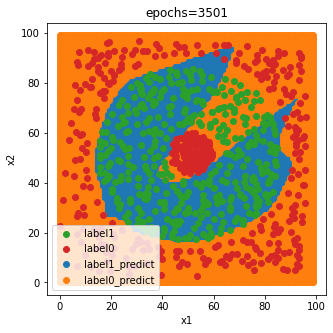

Epoch 1/500
630/630 [==============================] - 0s 27us/step - loss: 0.1979
Epoch 2/500
630/630 [==============================] - 0s 29us/step - loss: 0.1982
Epoch 3/500
630/630 [==============================] - 0s 24us/step - loss: 0.1981
Epoch 4/500
630/630 [==============================] - 0s 23us/step - loss: 0.1990
Epoch 5/500
630/630 [==============================] - 0s 23us/step - loss: 0.1987
Epoch 6/500
630/630 [==============================] - 0s 23us/step - loss: 0.2000
Epoch 7/500
630/630 [==============================] - 0s 24us/step - loss: 0.1980
Epoch 8/500
630/630 [==============================] - 0s 24us/step - loss: 0.2007
Epoch 9/500
630/630 [==============================] - 0s 25us/step - loss: 0.1981
Epoch 10/500
630/630 [==============================] - 0s 23us/step - loss: 0.1964
Epoch 11/500
630/630 [==============================] - 0s 26us/step - loss: 0.1977
Epoch 12/500
630/630 [==============================] - 0s 29us/step - loss: 0.1968
E

630/630 [==============================] - 0s 24us/step - loss: 0.1974
Epoch 99/500
630/630 [==============================] - 0s 23us/step - loss: 0.1968
Epoch 100/500
630/630 [==============================] - 0s 23us/step - loss: 0.1986
Epoch 101/500
630/630 [==============================] - 0s 28us/step - loss: 0.1978
Epoch 102/500
630/630 [==============================] - 0s 31us/step - loss: 0.1972
Epoch 103/500
630/630 [==============================] - 0s 28us/step - loss: 0.1964
Epoch 104/500
630/630 [==============================] - 0s 26us/step - loss: 0.1981
Epoch 105/500
630/630 [==============================] - 0s 25us/step - loss: 0.1973
Epoch 106/500
630/630 [==============================] - 0s 24us/step - loss: 0.1961
Epoch 107/500
630/630 [==============================] - 0s 24us/step - loss: 0.1965
Epoch 108/500
630/630 [==============================] - 0s 24us/step - loss: 0.1958
Epoch 109/500
630/630 [==============================] - 0s 26us/step - loss: 0.

630/630 [==============================] - 0s 23us/step - loss: 0.1942
Epoch 195/500
630/630 [==============================] - 0s 24us/step - loss: 0.1939
Epoch 196/500
630/630 [==============================] - 0s 23us/step - loss: 0.1929
Epoch 197/500
630/630 [==============================] - 0s 24us/step - loss: 0.1944
Epoch 198/500
630/630 [==============================] - 0s 24us/step - loss: 0.1962
Epoch 199/500
630/630 [==============================] - 0s 24us/step - loss: 0.1960
Epoch 200/500
630/630 [==============================] - 0s 24us/step - loss: 0.1952
Epoch 201/500
630/630 [==============================] - 0s 25us/step - loss: 0.1938
Epoch 202/500
630/630 [==============================] - 0s 24us/step - loss: 0.1944
Epoch 203/500
630/630 [==============================] - 0s 24us/step - loss: 0.1947
Epoch 204/500
630/630 [==============================] - 0s 23us/step - loss: 0.1932
Epoch 205/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.1946
Epoch 291/500
630/630 [==============================] - 0s 23us/step - loss: 0.1940
Epoch 292/500
630/630 [==============================] - 0s 24us/step - loss: 0.1957
Epoch 293/500
630/630 [==============================] - 0s 27us/step - loss: 0.1921
Epoch 294/500
630/630 [==============================] - 0s 26us/step - loss: 0.1919
Epoch 295/500
630/630 [==============================] - 0s 23us/step - loss: 0.1940
Epoch 296/500
630/630 [==============================] - 0s 23us/step - loss: 0.1925
Epoch 297/500
630/630 [==============================] - 0s 23us/step - loss: 0.1904
Epoch 298/500
630/630 [==============================] - 0s 22us/step - loss: 0.1927
Epoch 299/500
630/630 [==============================] - 0s 23us/step - loss: 0.1922
Epoch 300/500
630/630 [==============================] - 0s 22us/step - loss: 0.1912
Epoch 301/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 25us/step - loss: 0.1944
Epoch 387/500
630/630 [==============================] - 0s 25us/step - loss: 0.1911
Epoch 388/500
630/630 [==============================] - 0s 25us/step - loss: 0.1894
Epoch 389/500
630/630 [==============================] - 0s 24us/step - loss: 0.1905
Epoch 390/500
630/630 [==============================] - 0s 24us/step - loss: 0.1885
Epoch 391/500
630/630 [==============================] - 0s 27us/step - loss: 0.1907
Epoch 392/500
630/630 [==============================] - 0s 24us/step - loss: 0.1906
Epoch 393/500
630/630 [==============================] - 0s 24us/step - loss: 0.1898
Epoch 394/500
630/630 [==============================] - 0s 23us/step - loss: 0.1902
Epoch 395/500
630/630 [==============================] - 0s 23us/step - loss: 0.1891
Epoch 396/500
630/630 [==============================] - 0s 24us/step - loss: 0.1910
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.1871
Epoch 483/500
630/630 [==============================] - 0s 24us/step - loss: 0.1878
Epoch 484/500
630/630 [==============================] - 0s 24us/step - loss: 0.1881
Epoch 485/500
630/630 [==============================] - 0s 24us/step - loss: 0.1891
Epoch 486/500
630/630 [==============================] - 0s 24us/step - loss: 0.1881
Epoch 487/500
630/630 [==============================] - 0s 24us/step - loss: 0.1899
Epoch 488/500
630/630 [==============================] - 0s 24us/step - loss: 0.1892
Epoch 489/500
630/630 [==============================] - 0s 29us/step - loss: 0.1880
Epoch 490/500
630/630 [==============================] - 0s 24us/step - loss: 0.1893
Epoch 491/500
630/630 [==============================] - 0s 23us/step - loss: 0.1890
Epoch 492/500
630/630 [==============================] - 0s 23us/step - loss: 0.1918
Epoch 493/500
630/630 [==============================] - 0s 23us/step - loss: 0

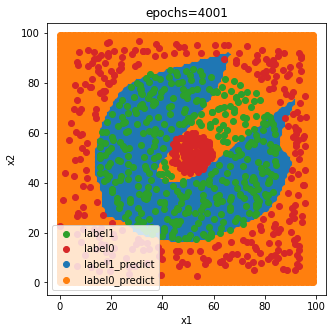

Epoch 1/500
630/630 [==============================] - 0s 27us/step - loss: 0.1886
Epoch 2/500
630/630 [==============================] - 0s 24us/step - loss: 0.1880
Epoch 3/500
630/630 [==============================] - 0s 23us/step - loss: 0.1875
Epoch 4/500
630/630 [==============================] - 0s 23us/step - loss: 0.1871
Epoch 5/500
630/630 [==============================] - 0s 22us/step - loss: 0.1880
Epoch 6/500
630/630 [==============================] - 0s 22us/step - loss: 0.1893
Epoch 7/500
630/630 [==============================] - 0s 22us/step - loss: 0.1862
Epoch 8/500
630/630 [==============================] - 0s 22us/step - loss: 0.1878
Epoch 9/500
630/630 [==============================] - 0s 22us/step - loss: 0.1878
Epoch 10/500
630/630 [==============================] - 0s 23us/step - loss: 0.1874
Epoch 11/500
630/630 [==============================] - 0s 23us/step - loss: 0.1886
Epoch 12/500
630/630 [==============================] - 0s 22us/step - loss: 0.1866
E

630/630 [==============================] - 0s 23us/step - loss: 0.1862
Epoch 99/500
630/630 [==============================] - 0s 24us/step - loss: 0.1883
Epoch 100/500
630/630 [==============================] - 0s 24us/step - loss: 0.1872
Epoch 101/500
630/630 [==============================] - 0s 25us/step - loss: 0.1878
Epoch 102/500
630/630 [==============================] - 0s 24us/step - loss: 0.1868
Epoch 103/500
630/630 [==============================] - 0s 24us/step - loss: 0.1875
Epoch 104/500
630/630 [==============================] - 0s 25us/step - loss: 0.1845
Epoch 105/500
630/630 [==============================] - 0s 24us/step - loss: 0.1871
Epoch 106/500
630/630 [==============================] - 0s 23us/step - loss: 0.1857
Epoch 107/500
630/630 [==============================] - 0s 25us/step - loss: 0.1863
Epoch 108/500
630/630 [==============================] - 0s 27us/step - loss: 0.1859
Epoch 109/500
630/630 [==============================] - 0s 25us/step - loss: 0.

630/630 [==============================] - 0s 24us/step - loss: 0.1848
Epoch 195/500
630/630 [==============================] - 0s 24us/step - loss: 0.1842
Epoch 196/500
630/630 [==============================] - 0s 23us/step - loss: 0.1839
Epoch 197/500
630/630 [==============================] - 0s 24us/step - loss: 0.1844
Epoch 198/500
630/630 [==============================] - 0s 25us/step - loss: 0.1845
Epoch 199/500
630/630 [==============================] - 0s 24us/step - loss: 0.1841
Epoch 200/500
630/630 [==============================] - 0s 26us/step - loss: 0.1852
Epoch 201/500
630/630 [==============================] - 0s 25us/step - loss: 0.1845
Epoch 202/500
630/630 [==============================] - 0s 24us/step - loss: 0.1855
Epoch 203/500
630/630 [==============================] - 0s 23us/step - loss: 0.1846
Epoch 204/500
630/630 [==============================] - 0s 24us/step - loss: 0.1847
Epoch 205/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.1845
Epoch 291/500
630/630 [==============================] - 0s 23us/step - loss: 0.1826
Epoch 292/500
630/630 [==============================] - 0s 22us/step - loss: 0.1835
Epoch 293/500
630/630 [==============================] - 0s 23us/step - loss: 0.1828
Epoch 294/500
630/630 [==============================] - 0s 23us/step - loss: 0.1827
Epoch 295/500
630/630 [==============================] - 0s 22us/step - loss: 0.1822
Epoch 296/500
630/630 [==============================] - 0s 22us/step - loss: 0.1821
Epoch 297/500
630/630 [==============================] - 0s 23us/step - loss: 0.1840
Epoch 298/500
630/630 [==============================] - 0s 22us/step - loss: 0.1839
Epoch 299/500
630/630 [==============================] - 0s 26us/step - loss: 0.1842
Epoch 300/500
630/630 [==============================] - 0s 23us/step - loss: 0.1835
Epoch 301/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.1796
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.1819
Epoch 388/500
630/630 [==============================] - 0s 24us/step - loss: 0.1800
Epoch 389/500
630/630 [==============================] - 0s 24us/step - loss: 0.1844
Epoch 390/500
630/630 [==============================] - 0s 23us/step - loss: 0.1812
Epoch 391/500
630/630 [==============================] - 0s 24us/step - loss: 0.1794
Epoch 392/500
630/630 [==============================] - 0s 23us/step - loss: 0.1819
Epoch 393/500
630/630 [==============================] - 0s 23us/step - loss: 0.1794
Epoch 394/500
630/630 [==============================] - 0s 24us/step - loss: 0.1796
Epoch 395/500
630/630 [==============================] - 0s 23us/step - loss: 0.1801
Epoch 396/500
630/630 [==============================] - 0s 24us/step - loss: 0.1793
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.1794
Epoch 483/500
630/630 [==============================] - 0s 23us/step - loss: 0.1834
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.1800
Epoch 485/500
630/630 [==============================] - 0s 24us/step - loss: 0.1793
Epoch 486/500
630/630 [==============================] - 0s 24us/step - loss: 0.1806
Epoch 487/500
630/630 [==============================] - 0s 23us/step - loss: 0.1834
Epoch 488/500
630/630 [==============================] - 0s 23us/step - loss: 0.1784
Epoch 489/500
630/630 [==============================] - 0s 22us/step - loss: 0.1805
Epoch 490/500
630/630 [==============================] - 0s 27us/step - loss: 0.1796
Epoch 491/500
630/630 [==============================] - 0s 23us/step - loss: 0.1786
Epoch 492/500
630/630 [==============================] - 0s 23us/step - loss: 0.1790
Epoch 493/500
630/630 [==============================] - 0s 23us/step - loss: 0

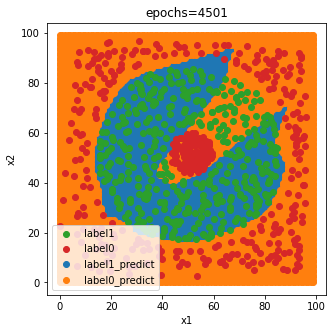

Epoch 1/500
630/630 [==============================] - 0s 27us/step - loss: 0.1796
Epoch 2/500
630/630 [==============================] - 0s 29us/step - loss: 0.1785
Epoch 3/500
630/630 [==============================] - 0s 40us/step - loss: 0.1785
Epoch 4/500
630/630 [==============================] - 0s 25us/step - loss: 0.1773
Epoch 5/500
630/630 [==============================] - 0s 23us/step - loss: 0.1800
Epoch 6/500
630/630 [==============================] - 0s 27us/step - loss: 0.1809
Epoch 7/500
630/630 [==============================] - 0s 24us/step - loss: 0.1792
Epoch 8/500
630/630 [==============================] - 0s 23us/step - loss: 0.1780
Epoch 9/500
630/630 [==============================] - 0s 23us/step - loss: 0.1802
Epoch 10/500
630/630 [==============================] - 0s 23us/step - loss: 0.1783
Epoch 11/500
630/630 [==============================] - 0s 23us/step - loss: 0.1792
Epoch 12/500
630/630 [==============================] - 0s 23us/step - loss: 0.1805
E

630/630 [==============================] - 0s 24us/step - loss: 0.1789
Epoch 99/500
630/630 [==============================] - 0s 24us/step - loss: 0.1794
Epoch 100/500
630/630 [==============================] - 0s 25us/step - loss: 0.1778
Epoch 101/500
630/630 [==============================] - 0s 24us/step - loss: 0.1767
Epoch 102/500
630/630 [==============================] - 0s 23us/step - loss: 0.1773
Epoch 103/500
630/630 [==============================] - 0s 25us/step - loss: 0.1787
Epoch 104/500
630/630 [==============================] - 0s 24us/step - loss: 0.1769
Epoch 105/500
630/630 [==============================] - 0s 24us/step - loss: 0.1766
Epoch 106/500
630/630 [==============================] - 0s 23us/step - loss: 0.1775
Epoch 107/500
630/630 [==============================] - 0s 23us/step - loss: 0.1769
Epoch 108/500
630/630 [==============================] - 0s 23us/step - loss: 0.1768
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 23us/step - loss: 0.1785
Epoch 195/500
630/630 [==============================] - 0s 23us/step - loss: 0.1770
Epoch 196/500
630/630 [==============================] - 0s 23us/step - loss: 0.1736
Epoch 197/500
630/630 [==============================] - 0s 25us/step - loss: 0.1757
Epoch 198/500
630/630 [==============================] - 0s 37us/step - loss: 0.1750
Epoch 199/500
630/630 [==============================] - 0s 32us/step - loss: 0.1777
Epoch 200/500
630/630 [==============================] - 0s 24us/step - loss: 0.1785
Epoch 201/500
630/630 [==============================] - 0s 24us/step - loss: 0.1745
Epoch 202/500
630/630 [==============================] - 0s 27us/step - loss: 0.1754
Epoch 203/500
630/630 [==============================] - 0s 29us/step - loss: 0.1771
Epoch 204/500
630/630 [==============================] - 0s 25us/step - loss: 0.1774
Epoch 205/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.1754
Epoch 291/500
630/630 [==============================] - 0s 23us/step - loss: 0.1747
Epoch 292/500
630/630 [==============================] - 0s 23us/step - loss: 0.1724
Epoch 293/500
630/630 [==============================] - 0s 23us/step - loss: 0.1735
Epoch 294/500
630/630 [==============================] - 0s 23us/step - loss: 0.1738
Epoch 295/500
630/630 [==============================] - 0s 23us/step - loss: 0.1721
Epoch 296/500
630/630 [==============================] - 0s 25us/step - loss: 0.1747
Epoch 297/500
630/630 [==============================] - 0s 36us/step - loss: 0.1724
Epoch 298/500
630/630 [==============================] - 0s 44us/step - loss: 0.1754
Epoch 299/500
630/630 [==============================] - 0s 31us/step - loss: 0.1753
Epoch 300/500
630/630 [==============================] - 0s 28us/step - loss: 0.1815
Epoch 301/500
630/630 [==============================] - 0s 33us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.1748
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.1721
Epoch 388/500
630/630 [==============================] - 0s 23us/step - loss: 0.1723
Epoch 389/500
630/630 [==============================] - 0s 23us/step - loss: 0.1727
Epoch 390/500
630/630 [==============================] - 0s 22us/step - loss: 0.1734
Epoch 391/500
630/630 [==============================] - 0s 23us/step - loss: 0.1735
Epoch 392/500
630/630 [==============================] - 0s 22us/step - loss: 0.1729
Epoch 393/500
630/630 [==============================] - 0s 23us/step - loss: 0.1721
Epoch 394/500
630/630 [==============================] - 0s 22us/step - loss: 0.1717
Epoch 395/500
630/630 [==============================] - 0s 23us/step - loss: 0.1711
Epoch 396/500
630/630 [==============================] - 0s 23us/step - loss: 0.1707
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.1699
Epoch 483/500
630/630 [==============================] - 0s 24us/step - loss: 0.1716
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.1712
Epoch 485/500
630/630 [==============================] - 0s 22us/step - loss: 0.1721
Epoch 486/500
630/630 [==============================] - 0s 22us/step - loss: 0.1700
Epoch 487/500
630/630 [==============================] - 0s 26us/step - loss: 0.1703
Epoch 488/500
630/630 [==============================] - 0s 23us/step - loss: 0.1695
Epoch 489/500
630/630 [==============================] - 0s 23us/step - loss: 0.1680
Epoch 490/500
630/630 [==============================] - 0s 29us/step - loss: 0.1688
Epoch 491/500
630/630 [==============================] - 0s 27us/step - loss: 0.1698
Epoch 492/500
630/630 [==============================] - 0s 26us/step - loss: 0.1687
Epoch 493/500
630/630 [==============================] - 0s 25us/step - loss: 0

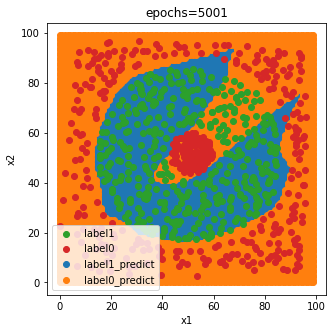

Epoch 1/500
630/630 [==============================] - 0s 34us/step - loss: 0.1729
Epoch 2/500
630/630 [==============================] - 0s 23us/step - loss: 0.1710
Epoch 3/500
630/630 [==============================] - 0s 23us/step - loss: 0.1697
Epoch 4/500
630/630 [==============================] - 0s 26us/step - loss: 0.1683
Epoch 5/500
630/630 [==============================] - 0s 25us/step - loss: 0.1692
Epoch 6/500
630/630 [==============================] - 0s 28us/step - loss: 0.1703
Epoch 7/500
630/630 [==============================] - 0s 23us/step - loss: 0.1697
Epoch 8/500
630/630 [==============================] - 0s 23us/step - loss: 0.1698
Epoch 9/500
630/630 [==============================] - 0s 23us/step - loss: 0.1707
Epoch 10/500
630/630 [==============================] - 0s 22us/step - loss: 0.1736
Epoch 11/500
630/630 [==============================] - 0s 22us/step - loss: 0.1684
Epoch 12/500
630/630 [==============================] - 0s 23us/step - loss: 0.1710
E

630/630 [==============================] - 0s 26us/step - loss: 0.1658
Epoch 99/500
630/630 [==============================] - 0s 25us/step - loss: 0.1687
Epoch 100/500
630/630 [==============================] - 0s 24us/step - loss: 0.1646
Epoch 101/500
630/630 [==============================] - 0s 23us/step - loss: 0.1643
Epoch 102/500
630/630 [==============================] - 0s 26us/step - loss: 0.1674
Epoch 103/500
630/630 [==============================] - 0s 25us/step - loss: 0.1655
Epoch 104/500
630/630 [==============================] - 0s 24us/step - loss: 0.1690
Epoch 105/500
630/630 [==============================] - 0s 23us/step - loss: 0.1657
Epoch 106/500
630/630 [==============================] - 0s 24us/step - loss: 0.1649
Epoch 107/500
630/630 [==============================] - 0s 23us/step - loss: 0.1660
Epoch 108/500
630/630 [==============================] - 0s 24us/step - loss: 0.1646
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 24us/step - loss: 0.1609
Epoch 195/500
630/630 [==============================] - 0s 23us/step - loss: 0.1585
Epoch 196/500
630/630 [==============================] - 0s 25us/step - loss: 0.1618
Epoch 197/500
630/630 [==============================] - 0s 23us/step - loss: 0.1594
Epoch 198/500
630/630 [==============================] - 0s 26us/step - loss: 0.1603
Epoch 199/500
630/630 [==============================] - 0s 24us/step - loss: 0.1591
Epoch 200/500
630/630 [==============================] - 0s 23us/step - loss: 0.1578
Epoch 201/500
630/630 [==============================] - 0s 24us/step - loss: 0.1602
Epoch 202/500
630/630 [==============================] - 0s 23us/step - loss: 0.1618
Epoch 203/500
630/630 [==============================] - 0s 23us/step - loss: 0.1598
Epoch 204/500
630/630 [==============================] - 0s 22us/step - loss: 0.1591
Epoch 205/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 28us/step - loss: 0.1504
Epoch 291/500
630/630 [==============================] - 0s 28us/step - loss: 0.1503
Epoch 292/500
630/630 [==============================] - 0s 29us/step - loss: 0.1549
Epoch 293/500
630/630 [==============================] - 0s 52us/step - loss: 0.1564
Epoch 294/500
630/630 [==============================] - 0s 41us/step - loss: 0.1509
Epoch 295/500
630/630 [==============================] - 0s 33us/step - loss: 0.1497
Epoch 296/500
630/630 [==============================] - 0s 32us/step - loss: 0.1508
Epoch 297/500
630/630 [==============================] - 0s 32us/step - loss: 0.1502
Epoch 298/500
630/630 [==============================] - 0s 31us/step - loss: 0.1515
Epoch 299/500
630/630 [==============================] - 0s 34us/step - loss: 0.1513
Epoch 300/500
630/630 [==============================] - 0s 33us/step - loss: 0.1498
Epoch 301/500
630/630 [==============================] - 0s 37us/step - loss: 0

630/630 [==============================] - 0s 28us/step - loss: 0.1420
Epoch 387/500
630/630 [==============================] - 0s 28us/step - loss: 0.1427
Epoch 388/500
630/630 [==============================] - 0s 31us/step - loss: 0.1411
Epoch 389/500
630/630 [==============================] - 0s 33us/step - loss: 0.1421
Epoch 390/500
630/630 [==============================] - 0s 29us/step - loss: 0.1447
Epoch 391/500
630/630 [==============================] - 0s 29us/step - loss: 0.1413
Epoch 392/500
630/630 [==============================] - 0s 29us/step - loss: 0.1413
Epoch 393/500
630/630 [==============================] - 0s 29us/step - loss: 0.1421
Epoch 394/500
630/630 [==============================] - 0s 28us/step - loss: 0.1468
Epoch 395/500
630/630 [==============================] - 0s 30us/step - loss: 0.1447
Epoch 396/500
630/630 [==============================] - 0s 29us/step - loss: 0.1411
Epoch 397/500
630/630 [==============================] - 0s 28us/step - loss: 0

630/630 [==============================] - 0s 29us/step - loss: 0.1351
Epoch 483/500
630/630 [==============================] - 0s 26us/step - loss: 0.1349
Epoch 484/500
630/630 [==============================] - 0s 28us/step - loss: 0.1351
Epoch 485/500
630/630 [==============================] - 0s 27us/step - loss: 0.1383
Epoch 486/500
630/630 [==============================] - 0s 27us/step - loss: 0.1355
Epoch 487/500
630/630 [==============================] - 0s 27us/step - loss: 0.1341
Epoch 488/500
630/630 [==============================] - 0s 26us/step - loss: 0.1373
Epoch 489/500
630/630 [==============================] - 0s 26us/step - loss: 0.1346
Epoch 490/500
630/630 [==============================] - 0s 27us/step - loss: 0.1331
Epoch 491/500
630/630 [==============================] - 0s 27us/step - loss: 0.1363
Epoch 492/500
630/630 [==============================] - 0s 27us/step - loss: 0.1340
Epoch 493/500
630/630 [==============================] - 0s 26us/step - loss: 0

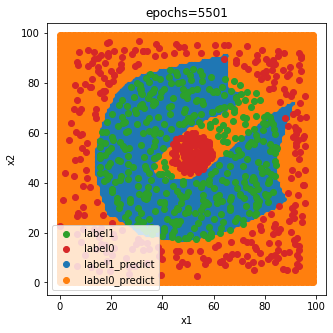

Epoch 1/500
630/630 [==============================] - 0s 29us/step - loss: 0.1350
Epoch 2/500
630/630 [==============================] - 0s 27us/step - loss: 0.1416
Epoch 3/500
630/630 [==============================] - 0s 27us/step - loss: 0.1373
Epoch 4/500
630/630 [==============================] - 0s 27us/step - loss: 0.1341
Epoch 5/500
630/630 [==============================] - 0s 27us/step - loss: 0.1343
Epoch 6/500
630/630 [==============================] - 0s 27us/step - loss: 0.1321
Epoch 7/500
630/630 [==============================] - 0s 26us/step - loss: 0.1335
Epoch 8/500
630/630 [==============================] - 0s 26us/step - loss: 0.1325
Epoch 9/500
630/630 [==============================] - 0s 28us/step - loss: 0.1339
Epoch 10/500
630/630 [==============================] - 0s 26us/step - loss: 0.1372
Epoch 11/500
630/630 [==============================] - 0s 26us/step - loss: 0.1350
Epoch 12/500
630/630 [==============================] - 0s 26us/step - loss: 0.1346
E

630/630 [==============================] - 0s 27us/step - loss: 0.1251
Epoch 99/500
630/630 [==============================] - 0s 29us/step - loss: 0.1280
Epoch 100/500
630/630 [==============================] - 0s 26us/step - loss: 0.1269
Epoch 101/500
630/630 [==============================] - 0s 27us/step - loss: 0.1257
Epoch 102/500
630/630 [==============================] - 0s 27us/step - loss: 0.1263
Epoch 103/500
630/630 [==============================] - 0s 27us/step - loss: 0.1257
Epoch 104/500
630/630 [==============================] - 0s 26us/step - loss: 0.1276
Epoch 105/500
630/630 [==============================] - 0s 27us/step - loss: 0.1248
Epoch 106/500
630/630 [==============================] - 0s 27us/step - loss: 0.1244
Epoch 107/500
630/630 [==============================] - 0s 26us/step - loss: 0.1265
Epoch 108/500
630/630 [==============================] - 0s 28us/step - loss: 0.1263
Epoch 109/500
630/630 [==============================] - 0s 26us/step - loss: 0.

630/630 [==============================] - 0s 28us/step - loss: 0.1164
Epoch 195/500
630/630 [==============================] - 0s 28us/step - loss: 0.1147
Epoch 196/500
630/630 [==============================] - 0s 26us/step - loss: 0.1147
Epoch 197/500
630/630 [==============================] - 0s 28us/step - loss: 0.1154
Epoch 198/500
630/630 [==============================] - 0s 29us/step - loss: 0.1163
Epoch 199/500
630/630 [==============================] - 0s 27us/step - loss: 0.1154
Epoch 200/500
630/630 [==============================] - 0s 28us/step - loss: 0.1145
Epoch 201/500
630/630 [==============================] - 0s 27us/step - loss: 0.1138
Epoch 202/500
630/630 [==============================] - 0s 28us/step - loss: 0.1160
Epoch 203/500
630/630 [==============================] - 0s 28us/step - loss: 0.1144
Epoch 204/500
630/630 [==============================] - 0s 27us/step - loss: 0.1134
Epoch 205/500
630/630 [==============================] - 0s 28us/step - loss: 0

630/630 [==============================] - 0s 27us/step - loss: 0.1062
Epoch 291/500
630/630 [==============================] - 0s 28us/step - loss: 0.1057
Epoch 292/500
630/630 [==============================] - 0s 27us/step - loss: 0.1080
Epoch 293/500
630/630 [==============================] - 0s 28us/step - loss: 0.1077
Epoch 294/500
630/630 [==============================] - 0s 26us/step - loss: 0.1067
Epoch 295/500
630/630 [==============================] - 0s 25us/step - loss: 0.1067
Epoch 296/500
630/630 [==============================] - 0s 27us/step - loss: 0.1073
Epoch 297/500
630/630 [==============================] - 0s 26us/step - loss: 0.1060
Epoch 298/500
630/630 [==============================] - 0s 25us/step - loss: 0.1070
Epoch 299/500
630/630 [==============================] - 0s 26us/step - loss: 0.1062
Epoch 300/500
630/630 [==============================] - 0s 26us/step - loss: 0.1052
Epoch 301/500
630/630 [==============================] - 0s 26us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.1007
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.0988
Epoch 388/500
630/630 [==============================] - 0s 22us/step - loss: 0.1013
Epoch 389/500
630/630 [==============================] - 0s 32us/step - loss: 0.0991
Epoch 390/500
630/630 [==============================] - 0s 37us/step - loss: 0.0984
Epoch 391/500
630/630 [==============================] - 0s 38us/step - loss: 0.0996
Epoch 392/500
630/630 [==============================] - 0s 30us/step - loss: 0.0994
Epoch 393/500
630/630 [==============================] - 0s 29us/step - loss: 0.1005
Epoch 394/500
630/630 [==============================] - 0s 28us/step - loss: 0.1000
Epoch 395/500
630/630 [==============================] - 0s 26us/step - loss: 0.0995
Epoch 396/500
630/630 [==============================] - 0s 27us/step - loss: 0.0986
Epoch 397/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.0936
Epoch 483/500
630/630 [==============================] - 0s 23us/step - loss: 0.0925
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.0936
Epoch 485/500
630/630 [==============================] - 0s 23us/step - loss: 0.0940
Epoch 486/500
630/630 [==============================] - 0s 23us/step - loss: 0.0953
Epoch 487/500
630/630 [==============================] - 0s 23us/step - loss: 0.0935
Epoch 488/500
630/630 [==============================] - 0s 23us/step - loss: 0.0906
Epoch 489/500
630/630 [==============================] - 0s 34us/step - loss: 0.1066
Epoch 490/500
630/630 [==============================] - 0s 24us/step - loss: 0.0953
Epoch 491/500
630/630 [==============================] - 0s 23us/step - loss: 0.0935
Epoch 492/500
630/630 [==============================] - 0s 24us/step - loss: 0.0922
Epoch 493/500
630/630 [==============================] - 0s 26us/step - loss: 0

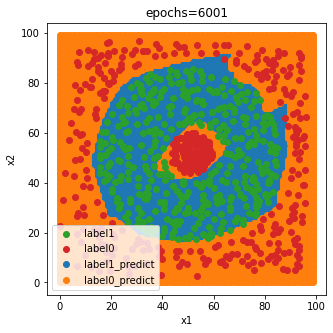

Epoch 1/500
630/630 [==============================] - 0s 28us/step - loss: 0.0933
Epoch 2/500
630/630 [==============================] - 0s 24us/step - loss: 0.0938
Epoch 3/500
630/630 [==============================] - 0s 23us/step - loss: 0.0946
Epoch 4/500
630/630 [==============================] - 0s 25us/step - loss: 0.0931
Epoch 5/500
630/630 [==============================] - 0s 23us/step - loss: 0.0910
Epoch 6/500
630/630 [==============================] - 0s 23us/step - loss: 0.0921
Epoch 7/500
630/630 [==============================] - 0s 23us/step - loss: 0.0932
Epoch 8/500
630/630 [==============================] - 0s 23us/step - loss: 0.0919
Epoch 9/500
630/630 [==============================] - 0s 25us/step - loss: 0.0909
Epoch 10/500
630/630 [==============================] - 0s 25us/step - loss: 0.0944
Epoch 11/500
630/630 [==============================] - 0s 23us/step - loss: 0.0918
Epoch 12/500
630/630 [==============================] - 0s 23us/step - loss: 0.0907
E

630/630 [==============================] - 0s 24us/step - loss: 0.0853
Epoch 99/500
630/630 [==============================] - 0s 26us/step - loss: 0.0863
Epoch 100/500
630/630 [==============================] - 0s 24us/step - loss: 0.0904
Epoch 101/500
630/630 [==============================] - 0s 28us/step - loss: 0.0877
Epoch 102/500
630/630 [==============================] - 0s 24us/step - loss: 0.0885
Epoch 103/500
630/630 [==============================] - 0s 26us/step - loss: 0.0844
Epoch 104/500
630/630 [==============================] - 0s 40us/step - loss: 0.0849
Epoch 105/500
630/630 [==============================] - 0s 29us/step - loss: 0.0852
Epoch 106/500
630/630 [==============================] - 0s 31us/step - loss: 0.0849
Epoch 107/500
630/630 [==============================] - 0s 25us/step - loss: 0.0862
Epoch 108/500
630/630 [==============================] - 0s 24us/step - loss: 0.0867
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 23us/step - loss: 0.0805
Epoch 195/500
630/630 [==============================] - 0s 22us/step - loss: 0.0799
Epoch 196/500
630/630 [==============================] - 0s 23us/step - loss: 0.0820
Epoch 197/500
630/630 [==============================] - 0s 22us/step - loss: 0.0818
Epoch 198/500
630/630 [==============================] - 0s 23us/step - loss: 0.0811
Epoch 199/500
630/630 [==============================] - 0s 22us/step - loss: 0.0799
Epoch 200/500
630/630 [==============================] - 0s 26us/step - loss: 0.0822
Epoch 201/500
630/630 [==============================] - 0s 23us/step - loss: 0.0795
Epoch 202/500
630/630 [==============================] - 0s 23us/step - loss: 0.0815
Epoch 203/500
630/630 [==============================] - 0s 23us/step - loss: 0.0793
Epoch 204/500
630/630 [==============================] - 0s 22us/step - loss: 0.0810
Epoch 205/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 22us/step - loss: 0.0747
Epoch 291/500
630/630 [==============================] - 0s 22us/step - loss: 0.0770
Epoch 292/500
630/630 [==============================] - 0s 23us/step - loss: 0.0751
Epoch 293/500
630/630 [==============================] - 0s 23us/step - loss: 0.0784
Epoch 294/500
630/630 [==============================] - 0s 22us/step - loss: 0.0796
Epoch 295/500
630/630 [==============================] - 0s 22us/step - loss: 0.0782
Epoch 296/500
630/630 [==============================] - 0s 22us/step - loss: 0.0776
Epoch 297/500
630/630 [==============================] - 0s 22us/step - loss: 0.0770
Epoch 298/500
630/630 [==============================] - 0s 22us/step - loss: 0.0759
Epoch 299/500
630/630 [==============================] - 0s 22us/step - loss: 0.0774
Epoch 300/500
630/630 [==============================] - 0s 22us/step - loss: 0.0746
Epoch 301/500
630/630 [==============================] - 0s 22us/step - loss: 0

630/630 [==============================] - 0s 22us/step - loss: 0.0717
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.0715
Epoch 388/500
630/630 [==============================] - 0s 23us/step - loss: 0.0728
Epoch 389/500
630/630 [==============================] - 0s 24us/step - loss: 0.0708
Epoch 390/500
630/630 [==============================] - 0s 24us/step - loss: 0.0716
Epoch 391/500
630/630 [==============================] - 0s 33us/step - loss: 0.0715
Epoch 392/500
630/630 [==============================] - 0s 23us/step - loss: 0.0773
Epoch 393/500
630/630 [==============================] - 0s 23us/step - loss: 0.0750
Epoch 394/500
630/630 [==============================] - 0s 23us/step - loss: 0.0739
Epoch 395/500
630/630 [==============================] - 0s 27us/step - loss: 0.0701
Epoch 396/500
630/630 [==============================] - 0s 23us/step - loss: 0.0698
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.0674
Epoch 483/500
630/630 [==============================] - 0s 23us/step - loss: 0.0670
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.0668
Epoch 485/500
630/630 [==============================] - 0s 23us/step - loss: 0.0663
Epoch 486/500
630/630 [==============================] - 0s 23us/step - loss: 0.0672
Epoch 487/500
630/630 [==============================] - 0s 23us/step - loss: 0.0661
Epoch 488/500
630/630 [==============================] - 0s 23us/step - loss: 0.0660
Epoch 489/500
630/630 [==============================] - 0s 23us/step - loss: 0.0654
Epoch 490/500
630/630 [==============================] - 0s 22us/step - loss: 0.0681
Epoch 491/500
630/630 [==============================] - 0s 24us/step - loss: 0.0695
Epoch 492/500
630/630 [==============================] - 0s 26us/step - loss: 0.0670
Epoch 493/500
630/630 [==============================] - 0s 25us/step - loss: 0

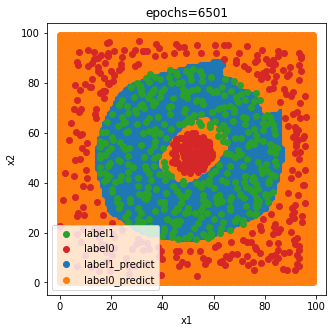

Epoch 1/500
630/630 [==============================] - 0s 26us/step - loss: 0.0675
Epoch 2/500
630/630 [==============================] - 0s 22us/step - loss: 0.0668
Epoch 3/500
630/630 [==============================] - 0s 23us/step - loss: 0.0690
Epoch 4/500
630/630 [==============================] - 0s 23us/step - loss: 0.0675
Epoch 5/500
630/630 [==============================] - 0s 22us/step - loss: 0.0674
Epoch 6/500
630/630 [==============================] - 0s 23us/step - loss: 0.0649
Epoch 7/500
630/630 [==============================] - 0s 23us/step - loss: 0.0655
Epoch 8/500
630/630 [==============================] - 0s 24us/step - loss: 0.0650
Epoch 9/500
630/630 [==============================] - 0s 24us/step - loss: 0.0682
Epoch 10/500
630/630 [==============================] - 0s 43us/step - loss: 0.0670
Epoch 11/500
630/630 [==============================] - 0s 33us/step - loss: 0.0655
Epoch 12/500
630/630 [==============================] - 0s 33us/step - loss: 0.0665
E

630/630 [==============================] - 0s 27us/step - loss: 0.0635
Epoch 99/500
630/630 [==============================] - 0s 30us/step - loss: 0.0621
Epoch 100/500
630/630 [==============================] - 0s 27us/step - loss: 0.0624
Epoch 101/500
630/630 [==============================] - 0s 26us/step - loss: 0.0621
Epoch 102/500
630/630 [==============================] - 0s 24us/step - loss: 0.0617
Epoch 103/500
630/630 [==============================] - 0s 25us/step - loss: 0.0628
Epoch 104/500
630/630 [==============================] - 0s 24us/step - loss: 0.0629
Epoch 105/500
630/630 [==============================] - 0s 24us/step - loss: 0.0636
Epoch 106/500
630/630 [==============================] - 0s 27us/step - loss: 0.0690
Epoch 107/500
630/630 [==============================] - 0s 25us/step - loss: 0.0605
Epoch 108/500
630/630 [==============================] - 0s 25us/step - loss: 0.0662
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 23us/step - loss: 0.0595
Epoch 195/500
630/630 [==============================] - 0s 25us/step - loss: 0.0609
Epoch 196/500
630/630 [==============================] - 0s 23us/step - loss: 0.0605
Epoch 197/500
630/630 [==============================] - 0s 24us/step - loss: 0.0607
Epoch 198/500
630/630 [==============================] - 0s 23us/step - loss: 0.0593
Epoch 199/500
630/630 [==============================] - 0s 27us/step - loss: 0.0584
Epoch 200/500
630/630 [==============================] - 0s 24us/step - loss: 0.0582
Epoch 201/500
630/630 [==============================] - 0s 24us/step - loss: 0.0628
Epoch 202/500
630/630 [==============================] - 0s 23us/step - loss: 0.0576
Epoch 203/500
630/630 [==============================] - 0s 23us/step - loss: 0.0581
Epoch 204/500
630/630 [==============================] - 0s 25us/step - loss: 0.0598
Epoch 205/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 26us/step - loss: 0.0564
Epoch 291/500
630/630 [==============================] - 0s 26us/step - loss: 0.0573
Epoch 292/500
630/630 [==============================] - 0s 26us/step - loss: 0.0552
Epoch 293/500
630/630 [==============================] - 0s 25us/step - loss: 0.0568
Epoch 294/500
630/630 [==============================] - 0s 31us/step - loss: 0.0554
Epoch 295/500
630/630 [==============================] - 0s 37us/step - loss: 0.0571
Epoch 296/500
630/630 [==============================] - 0s 27us/step - loss: 0.0542
Epoch 297/500
630/630 [==============================] - 0s 26us/step - loss: 0.0550
Epoch 298/500
630/630 [==============================] - 0s 25us/step - loss: 0.0565
Epoch 299/500
630/630 [==============================] - 0s 27us/step - loss: 0.0584
Epoch 300/500
630/630 [==============================] - 0s 27us/step - loss: 0.0542
Epoch 301/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.0523
Epoch 387/500
630/630 [==============================] - 0s 24us/step - loss: 0.0516
Epoch 388/500
630/630 [==============================] - 0s 24us/step - loss: 0.0532
Epoch 389/500
630/630 [==============================] - 0s 23us/step - loss: 0.0530
Epoch 390/500
630/630 [==============================] - 0s 23us/step - loss: 0.0524
Epoch 391/500
630/630 [==============================] - 0s 24us/step - loss: 0.0528
Epoch 392/500
630/630 [==============================] - 0s 23us/step - loss: 0.0520
Epoch 393/500
630/630 [==============================] - 0s 23us/step - loss: 0.0536
Epoch 394/500
630/630 [==============================] - 0s 24us/step - loss: 0.0515
Epoch 395/500
630/630 [==============================] - 0s 24us/step - loss: 0.0570
Epoch 396/500
630/630 [==============================] - 0s 23us/step - loss: 0.0576
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.0535
Epoch 483/500
630/630 [==============================] - 0s 23us/step - loss: 0.0506
Epoch 484/500
630/630 [==============================] - 0s 25us/step - loss: 0.0515
Epoch 485/500
630/630 [==============================] - 0s 23us/step - loss: 0.0518
Epoch 486/500
630/630 [==============================] - 0s 23us/step - loss: 0.0496
Epoch 487/500
630/630 [==============================] - 0s 23us/step - loss: 0.0494
Epoch 488/500
630/630 [==============================] - 0s 23us/step - loss: 0.0499
Epoch 489/500
630/630 [==============================] - 0s 23us/step - loss: 0.0522
Epoch 490/500
630/630 [==============================] - 0s 23us/step - loss: 0.0522
Epoch 491/500
630/630 [==============================] - 0s 23us/step - loss: 0.0523
Epoch 492/500
630/630 [==============================] - 0s 23us/step - loss: 0.0514
Epoch 493/500
630/630 [==============================] - 0s 24us/step - loss: 0

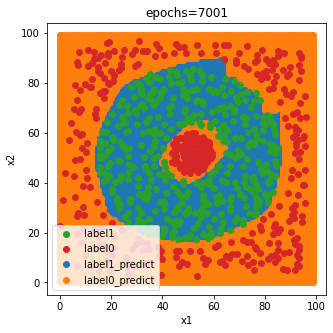

Epoch 1/500
630/630 [==============================] - 0s 26us/step - loss: 0.0488
Epoch 2/500
630/630 [==============================] - 0s 24us/step - loss: 0.0503
Epoch 3/500
630/630 [==============================] - 0s 23us/step - loss: 0.0515
Epoch 4/500
630/630 [==============================] - 0s 24us/step - loss: 0.0485
Epoch 5/500
630/630 [==============================] - 0s 23us/step - loss: 0.0478
Epoch 6/500
630/630 [==============================] - 0s 23us/step - loss: 0.0485
Epoch 7/500
630/630 [==============================] - 0s 23us/step - loss: 0.0502
Epoch 8/500
630/630 [==============================] - 0s 23us/step - loss: 0.0490
Epoch 9/500
630/630 [==============================] - 0s 23us/step - loss: 0.0495
Epoch 10/500
630/630 [==============================] - 0s 23us/step - loss: 0.0479
Epoch 11/500
630/630 [==============================] - 0s 23us/step - loss: 0.0505
Epoch 12/500
630/630 [==============================] - 0s 23us/step - loss: 0.0523
E

630/630 [==============================] - 0s 24us/step - loss: 0.0458
Epoch 99/500
630/630 [==============================] - 0s 25us/step - loss: 0.0466
Epoch 100/500
630/630 [==============================] - 0s 24us/step - loss: 0.0461
Epoch 101/500
630/630 [==============================] - 0s 24us/step - loss: 0.0489
Epoch 102/500
630/630 [==============================] - 0s 24us/step - loss: 0.0471
Epoch 103/500
630/630 [==============================] - 0s 25us/step - loss: 0.0471
Epoch 104/500
630/630 [==============================] - 0s 24us/step - loss: 0.0507
Epoch 105/500
630/630 [==============================] - 0s 23us/step - loss: 0.0469
Epoch 106/500
630/630 [==============================] - 0s 24us/step - loss: 0.0478
Epoch 107/500
630/630 [==============================] - 0s 24us/step - loss: 0.0467
Epoch 108/500
630/630 [==============================] - 0s 24us/step - loss: 0.0471
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 23us/step - loss: 0.0440
Epoch 195/500
630/630 [==============================] - 0s 23us/step - loss: 0.0443
Epoch 196/500
630/630 [==============================] - 0s 24us/step - loss: 0.0443
Epoch 197/500
630/630 [==============================] - 0s 23us/step - loss: 0.0469
Epoch 198/500
630/630 [==============================] - 0s 23us/step - loss: 0.0473
Epoch 199/500
630/630 [==============================] - 0s 22us/step - loss: 0.0459
Epoch 200/500
630/630 [==============================] - 0s 23us/step - loss: 0.0440
Epoch 201/500
630/630 [==============================] - 0s 23us/step - loss: 0.0436
Epoch 202/500
630/630 [==============================] - 0s 22us/step - loss: 0.0449
Epoch 203/500
630/630 [==============================] - 0s 26us/step - loss: 0.0465
Epoch 204/500
630/630 [==============================] - 0s 24us/step - loss: 0.0451
Epoch 205/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.0421
Epoch 291/500
630/630 [==============================] - 0s 23us/step - loss: 0.0438
Epoch 292/500
630/630 [==============================] - 0s 22us/step - loss: 0.0450
Epoch 293/500
630/630 [==============================] - 0s 23us/step - loss: 0.0434
Epoch 294/500
630/630 [==============================] - 0s 23us/step - loss: 0.0452
Epoch 295/500
630/630 [==============================] - 0s 23us/step - loss: 0.0442
Epoch 296/500
630/630 [==============================] - 0s 23us/step - loss: 0.0434
Epoch 297/500
630/630 [==============================] - 0s 23us/step - loss: 0.0419
Epoch 298/500
630/630 [==============================] - 0s 24us/step - loss: 0.0438
Epoch 299/500
630/630 [==============================] - 0s 23us/step - loss: 0.0453
Epoch 300/500
630/630 [==============================] - 0s 23us/step - loss: 0.0421
Epoch 301/500
630/630 [==============================] - 0s 25us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.0423
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.0420
Epoch 388/500
630/630 [==============================] - 0s 24us/step - loss: 0.0424
Epoch 389/500
630/630 [==============================] - 0s 23us/step - loss: 0.0406
Epoch 390/500
630/630 [==============================] - 0s 24us/step - loss: 0.0399
Epoch 391/500
630/630 [==============================] - 0s 23us/step - loss: 0.0400
Epoch 392/500
630/630 [==============================] - 0s 23us/step - loss: 0.0392
Epoch 393/500
630/630 [==============================] - 0s 23us/step - loss: 0.0398
Epoch 394/500
630/630 [==============================] - 0s 22us/step - loss: 0.0399
Epoch 395/500
630/630 [==============================] - 0s 24us/step - loss: 0.0395
Epoch 396/500
630/630 [==============================] - 0s 23us/step - loss: 0.0402
Epoch 397/500
630/630 [==============================] - 0s 28us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.0377
Epoch 483/500
630/630 [==============================] - 0s 23us/step - loss: 0.0392
Epoch 484/500
630/630 [==============================] - 0s 25us/step - loss: 0.0368
Epoch 485/500
630/630 [==============================] - 0s 25us/step - loss: 0.0389
Epoch 486/500
630/630 [==============================] - 0s 23us/step - loss: 0.0381
Epoch 487/500
630/630 [==============================] - 0s 22us/step - loss: 0.0370
Epoch 488/500
630/630 [==============================] - 0s 23us/step - loss: 0.0384
Epoch 489/500
630/630 [==============================] - 0s 22us/step - loss: 0.0393
Epoch 490/500
630/630 [==============================] - 0s 23us/step - loss: 0.0368
Epoch 491/500
630/630 [==============================] - 0s 22us/step - loss: 0.0407
Epoch 492/500
630/630 [==============================] - 0s 23us/step - loss: 0.0405
Epoch 493/500
630/630 [==============================] - 0s 24us/step - loss: 0

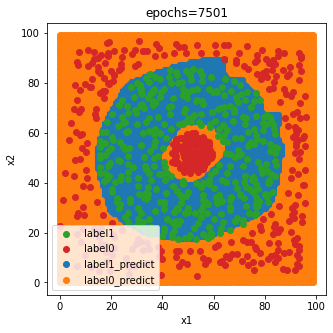

Epoch 1/500
630/630 [==============================] - 0s 25us/step - loss: 0.0365
Epoch 2/500
630/630 [==============================] - 0s 23us/step - loss: 0.0370
Epoch 3/500
630/630 [==============================] - 0s 23us/step - loss: 0.0378
Epoch 4/500
630/630 [==============================] - 0s 23us/step - loss: 0.0388
Epoch 5/500
630/630 [==============================] - 0s 24us/step - loss: 0.0381
Epoch 6/500
630/630 [==============================] - 0s 23us/step - loss: 0.0388
Epoch 7/500
630/630 [==============================] - 0s 23us/step - loss: 0.0384
Epoch 8/500
630/630 [==============================] - 0s 24us/step - loss: 0.0375
Epoch 9/500
630/630 [==============================] - 0s 23us/step - loss: 0.0379
Epoch 10/500
630/630 [==============================] - 0s 23us/step - loss: 0.0411
Epoch 11/500
630/630 [==============================] - 0s 24us/step - loss: 0.0399
Epoch 12/500
630/630 [==============================] - 0s 23us/step - loss: 0.0379
E

630/630 [==============================] - 0s 23us/step - loss: 0.0360
Epoch 99/500
630/630 [==============================] - 0s 23us/step - loss: 0.0350
Epoch 100/500
630/630 [==============================] - 0s 23us/step - loss: 0.0360
Epoch 101/500
630/630 [==============================] - 0s 23us/step - loss: 0.0360
Epoch 102/500
630/630 [==============================] - 0s 23us/step - loss: 0.0372
Epoch 103/500
630/630 [==============================] - 0s 23us/step - loss: 0.0347
Epoch 104/500
630/630 [==============================] - 0s 23us/step - loss: 0.0356
Epoch 105/500
630/630 [==============================] - 0s 23us/step - loss: 0.0352
Epoch 106/500
630/630 [==============================] - 0s 23us/step - loss: 0.0364
Epoch 107/500
630/630 [==============================] - 0s 23us/step - loss: 0.0353
Epoch 108/500
630/630 [==============================] - 0s 25us/step - loss: 0.0355
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 23us/step - loss: 0.0353
Epoch 195/500
630/630 [==============================] - 0s 23us/step - loss: 0.0350
Epoch 196/500
630/630 [==============================] - 0s 23us/step - loss: 0.0346
Epoch 197/500
630/630 [==============================] - 0s 29us/step - loss: 0.0337
Epoch 198/500
630/630 [==============================] - 0s 24us/step - loss: 0.0352
Epoch 199/500
630/630 [==============================] - 0s 41us/step - loss: 0.0339
Epoch 200/500
630/630 [==============================] - 0s 29us/step - loss: 0.0346
Epoch 201/500
630/630 [==============================] - 0s 27us/step - loss: 0.0344
Epoch 202/500
630/630 [==============================] - 0s 36us/step - loss: 0.0355
Epoch 203/500
630/630 [==============================] - 0s 24us/step - loss: 0.0358
Epoch 204/500
630/630 [==============================] - 0s 25us/step - loss: 0.0346
Epoch 205/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.0339
Epoch 291/500
630/630 [==============================] - 0s 24us/step - loss: 0.0345
Epoch 292/500
630/630 [==============================] - 0s 27us/step - loss: 0.0356
Epoch 293/500
630/630 [==============================] - 0s 29us/step - loss: 0.0331
Epoch 294/500
630/630 [==============================] - 0s 26us/step - loss: 0.0313
Epoch 295/500
630/630 [==============================] - 0s 28us/step - loss: 0.0332
Epoch 296/500
630/630 [==============================] - 0s 26us/step - loss: 0.0313
Epoch 297/500
630/630 [==============================] - 0s 29us/step - loss: 0.0333
Epoch 298/500
630/630 [==============================] - 0s 31us/step - loss: 0.0342
Epoch 299/500
630/630 [==============================] - 0s 24us/step - loss: 0.0339
Epoch 300/500
630/630 [==============================] - 0s 23us/step - loss: 0.0328
Epoch 301/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 22us/step - loss: 0.0323
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.0341
Epoch 388/500
630/630 [==============================] - 0s 23us/step - loss: 0.0309
Epoch 389/500
630/630 [==============================] - 0s 22us/step - loss: 0.0307
Epoch 390/500
630/630 [==============================] - 0s 22us/step - loss: 0.0310
Epoch 391/500
630/630 [==============================] - 0s 26us/step - loss: 0.0330
Epoch 392/500
630/630 [==============================] - 0s 23us/step - loss: 0.0315
Epoch 393/500
630/630 [==============================] - 0s 23us/step - loss: 0.0303
Epoch 394/500
630/630 [==============================] - 0s 22us/step - loss: 0.0314
Epoch 395/500
630/630 [==============================] - 0s 23us/step - loss: 0.0309
Epoch 396/500
630/630 [==============================] - 0s 23us/step - loss: 0.0326
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 22us/step - loss: 0.0285
Epoch 483/500
630/630 [==============================] - 0s 22us/step - loss: 0.0303
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.0305
Epoch 485/500
630/630 [==============================] - 0s 22us/step - loss: 0.0291
Epoch 486/500
630/630 [==============================] - 0s 22us/step - loss: 0.0298
Epoch 487/500
630/630 [==============================] - 0s 22us/step - loss: 0.0296
Epoch 488/500
630/630 [==============================] - 0s 24us/step - loss: 0.0299
Epoch 489/500
630/630 [==============================] - 0s 24us/step - loss: 0.0294
Epoch 490/500
630/630 [==============================] - 0s 23us/step - loss: 0.0293
Epoch 491/500
630/630 [==============================] - 0s 23us/step - loss: 0.0294
Epoch 492/500
630/630 [==============================] - 0s 23us/step - loss: 0.0292
Epoch 493/500
630/630 [==============================] - 0s 23us/step - loss: 0

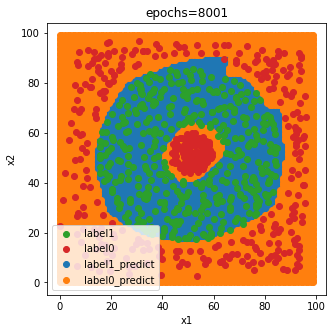

Epoch 1/500
630/630 [==============================] - 0s 26us/step - loss: 0.0295
Epoch 2/500
630/630 [==============================] - 0s 22us/step - loss: 0.0287
Epoch 3/500
630/630 [==============================] - 0s 22us/step - loss: 0.0302
Epoch 4/500
630/630 [==============================] - 0s 22us/step - loss: 0.0307
Epoch 5/500
630/630 [==============================] - 0s 22us/step - loss: 0.0296
Epoch 6/500
630/630 [==============================] - 0s 22us/step - loss: 0.0296
Epoch 7/500
630/630 [==============================] - 0s 22us/step - loss: 0.0284
Epoch 8/500
630/630 [==============================] - 0s 22us/step - loss: 0.0283
Epoch 9/500
630/630 [==============================] - 0s 22us/step - loss: 0.0283
Epoch 10/500
630/630 [==============================] - 0s 22us/step - loss: 0.0301
Epoch 11/500
630/630 [==============================] - 0s 24us/step - loss: 0.0297
Epoch 12/500
630/630 [==============================] - 0s 23us/step - loss: 0.0285
E

630/630 [==============================] - 0s 25us/step - loss: 0.0310
Epoch 99/500
630/630 [==============================] - 0s 23us/step - loss: 0.0290
Epoch 100/500
630/630 [==============================] - 0s 26us/step - loss: 0.0286
Epoch 101/500
630/630 [==============================] - 0s 23us/step - loss: 0.0298
Epoch 102/500
630/630 [==============================] - 0s 23us/step - loss: 0.0283
Epoch 103/500
630/630 [==============================] - 0s 24us/step - loss: 0.0282
Epoch 104/500
630/630 [==============================] - 0s 24us/step - loss: 0.0278
Epoch 105/500
630/630 [==============================] - 0s 24us/step - loss: 0.0278
Epoch 106/500
630/630 [==============================] - 0s 25us/step - loss: 0.0279
Epoch 107/500
630/630 [==============================] - 0s 23us/step - loss: 0.0286
Epoch 108/500
630/630 [==============================] - 0s 25us/step - loss: 0.0272
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 24us/step - loss: 0.0297
Epoch 195/500
630/630 [==============================] - 0s 23us/step - loss: 0.0260
Epoch 196/500
630/630 [==============================] - 0s 25us/step - loss: 0.0263
Epoch 197/500
630/630 [==============================] - 0s 23us/step - loss: 0.0275
Epoch 198/500
630/630 [==============================] - 0s 23us/step - loss: 0.0271
Epoch 199/500
630/630 [==============================] - 0s 25us/step - loss: 0.0264
Epoch 200/500
630/630 [==============================] - 0s 23us/step - loss: 0.0280
Epoch 201/500
630/630 [==============================] - 0s 23us/step - loss: 0.0262
Epoch 202/500
630/630 [==============================] - 0s 25us/step - loss: 0.0270
Epoch 203/500
630/630 [==============================] - 0s 23us/step - loss: 0.0266
Epoch 204/500
630/630 [==============================] - 0s 23us/step - loss: 0.0271
Epoch 205/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 28us/step - loss: 0.0308
Epoch 291/500
630/630 [==============================] - 0s 23us/step - loss: 0.0277
Epoch 292/500
630/630 [==============================] - 0s 23us/step - loss: 0.0268
Epoch 293/500
630/630 [==============================] - 0s 29us/step - loss: 0.0245
Epoch 294/500
630/630 [==============================] - 0s 24us/step - loss: 0.0258
Epoch 295/500
630/630 [==============================] - 0s 23us/step - loss: 0.0271
Epoch 296/500
630/630 [==============================] - 0s 23us/step - loss: 0.0268
Epoch 297/500
630/630 [==============================] - 0s 22us/step - loss: 0.0265
Epoch 298/500
630/630 [==============================] - 0s 23us/step - loss: 0.0256
Epoch 299/500
630/630 [==============================] - 0s 23us/step - loss: 0.0265
Epoch 300/500
630/630 [==============================] - 0s 24us/step - loss: 0.0253
Epoch 301/500
630/630 [==============================] - 0s 25us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.0241
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.0241
Epoch 388/500
630/630 [==============================] - 0s 23us/step - loss: 0.0249
Epoch 389/500
630/630 [==============================] - 0s 23us/step - loss: 0.0247
Epoch 390/500
630/630 [==============================] - 0s 23us/step - loss: 0.0254
Epoch 391/500
630/630 [==============================] - 0s 23us/step - loss: 0.0246
Epoch 392/500
630/630 [==============================] - 0s 25us/step - loss: 0.0248
Epoch 393/500
630/630 [==============================] - 0s 27us/step - loss: 0.0244
Epoch 394/500
630/630 [==============================] - 0s 23us/step - loss: 0.0262
Epoch 395/500
630/630 [==============================] - 0s 22us/step - loss: 0.0278
Epoch 396/500
630/630 [==============================] - 0s 23us/step - loss: 0.0260
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.0291
Epoch 483/500
630/630 [==============================] - 0s 24us/step - loss: 0.0255
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.0238
Epoch 485/500
630/630 [==============================] - 0s 24us/step - loss: 0.0242
Epoch 486/500
630/630 [==============================] - 0s 24us/step - loss: 0.0241
Epoch 487/500
630/630 [==============================] - 0s 23us/step - loss: 0.0251
Epoch 488/500
630/630 [==============================] - 0s 24us/step - loss: 0.0237
Epoch 489/500
630/630 [==============================] - 0s 22us/step - loss: 0.0231
Epoch 490/500
630/630 [==============================] - 0s 23us/step - loss: 0.0258
Epoch 491/500
630/630 [==============================] - 0s 22us/step - loss: 0.0267
Epoch 492/500
630/630 [==============================] - 0s 23us/step - loss: 0.0280
Epoch 493/500
630/630 [==============================] - 0s 23us/step - loss: 0

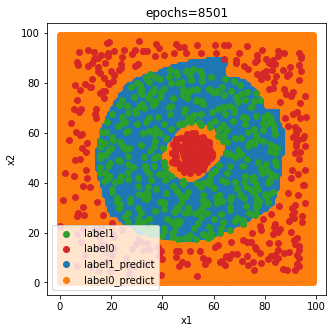

Epoch 1/500
630/630 [==============================] - 0s 26us/step - loss: 0.0236
Epoch 2/500
630/630 [==============================] - 0s 24us/step - loss: 0.0277
Epoch 3/500
630/630 [==============================] - 0s 24us/step - loss: 0.0238
Epoch 4/500
630/630 [==============================] - 0s 26us/step - loss: 0.0250
Epoch 5/500
630/630 [==============================] - 0s 23us/step - loss: 0.0244
Epoch 6/500
630/630 [==============================] - 0s 24us/step - loss: 0.0279
Epoch 7/500
630/630 [==============================] - 0s 23us/step - loss: 0.0272
Epoch 8/500
630/630 [==============================] - 0s 23us/step - loss: 0.0239
Epoch 9/500
630/630 [==============================] - 0s 23us/step - loss: 0.0269
Epoch 10/500
630/630 [==============================] - 0s 23us/step - loss: 0.0273
Epoch 11/500
630/630 [==============================] - 0s 23us/step - loss: 0.0250
Epoch 12/500
630/630 [==============================] - 0s 23us/step - loss: 0.0230
E

630/630 [==============================] - 0s 23us/step - loss: 0.0241
Epoch 99/500
630/630 [==============================] - 0s 22us/step - loss: 0.0234
Epoch 100/500
630/630 [==============================] - 0s 23us/step - loss: 0.0249
Epoch 101/500
630/630 [==============================] - 0s 23us/step - loss: 0.0224
Epoch 102/500
630/630 [==============================] - 0s 26us/step - loss: 0.0220
Epoch 103/500
630/630 [==============================] - 0s 23us/step - loss: 0.0260
Epoch 104/500
630/630 [==============================] - 0s 23us/step - loss: 0.0218
Epoch 105/500
630/630 [==============================] - 0s 24us/step - loss: 0.0223
Epoch 106/500
630/630 [==============================] - 0s 22us/step - loss: 0.0229
Epoch 107/500
630/630 [==============================] - 0s 23us/step - loss: 0.0221
Epoch 108/500
630/630 [==============================] - 0s 23us/step - loss: 0.0225
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 23us/step - loss: 0.0219
Epoch 195/500
630/630 [==============================] - 0s 24us/step - loss: 0.0213
Epoch 196/500
630/630 [==============================] - 0s 27us/step - loss: 0.0217
Epoch 197/500
630/630 [==============================] - 0s 24us/step - loss: 0.0224
Epoch 198/500
630/630 [==============================] - 0s 27us/step - loss: 0.0220
Epoch 199/500
630/630 [==============================] - 0s 23us/step - loss: 0.0229
Epoch 200/500
630/630 [==============================] - 0s 23us/step - loss: 0.0234
Epoch 201/500
630/630 [==============================] - 0s 23us/step - loss: 0.0212
Epoch 202/500
630/630 [==============================] - 0s 23us/step - loss: 0.0210
Epoch 203/500
630/630 [==============================] - 0s 23us/step - loss: 0.0222
Epoch 204/500
630/630 [==============================] - 0s 24us/step - loss: 0.0217
Epoch 205/500
630/630 [==============================] - 0s 26us/step - loss: 0

630/630 [==============================] - 0s 22us/step - loss: 0.0211
Epoch 291/500
630/630 [==============================] - 0s 24us/step - loss: 0.0216
Epoch 292/500
630/630 [==============================] - 0s 25us/step - loss: 0.0208
Epoch 293/500
630/630 [==============================] - 0s 24us/step - loss: 0.0208
Epoch 294/500
630/630 [==============================] - 0s 25us/step - loss: 0.0200
Epoch 295/500
630/630 [==============================] - 0s 25us/step - loss: 0.0230
Epoch 296/500
630/630 [==============================] - 0s 24us/step - loss: 0.0222
Epoch 297/500
630/630 [==============================] - 0s 22us/step - loss: 0.0204
Epoch 298/500
630/630 [==============================] - 0s 22us/step - loss: 0.0210
Epoch 299/500
630/630 [==============================] - 0s 22us/step - loss: 0.0242
Epoch 300/500
630/630 [==============================] - 0s 24us/step - loss: 0.0234
Epoch 301/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.0204
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.0201
Epoch 388/500
630/630 [==============================] - 0s 23us/step - loss: 0.0195
Epoch 389/500
630/630 [==============================] - 0s 23us/step - loss: 0.0215
Epoch 390/500
630/630 [==============================] - 0s 24us/step - loss: 0.0217
Epoch 391/500
630/630 [==============================] - 0s 25us/step - loss: 0.0230
Epoch 392/500
630/630 [==============================] - 0s 23us/step - loss: 0.0202
Epoch 393/500
630/630 [==============================] - 0s 23us/step - loss: 0.0199
Epoch 394/500
630/630 [==============================] - 0s 24us/step - loss: 0.0194
Epoch 395/500
630/630 [==============================] - 0s 23us/step - loss: 0.0208
Epoch 396/500
630/630 [==============================] - 0s 24us/step - loss: 0.0199
Epoch 397/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.0224
Epoch 483/500
630/630 [==============================] - 0s 23us/step - loss: 0.0216
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.0217
Epoch 485/500
630/630 [==============================] - 0s 22us/step - loss: 0.0193
Epoch 486/500
630/630 [==============================] - 0s 23us/step - loss: 0.0232
Epoch 487/500
630/630 [==============================] - 0s 22us/step - loss: 0.0204
Epoch 488/500
630/630 [==============================] - 0s 22us/step - loss: 0.0206
Epoch 489/500
630/630 [==============================] - 0s 22us/step - loss: 0.0198
Epoch 490/500
630/630 [==============================] - 0s 22us/step - loss: 0.0198
Epoch 491/500
630/630 [==============================] - 0s 22us/step - loss: 0.0202
Epoch 492/500
630/630 [==============================] - 0s 22us/step - loss: 0.0191
Epoch 493/500
630/630 [==============================] - 0s 23us/step - loss: 0

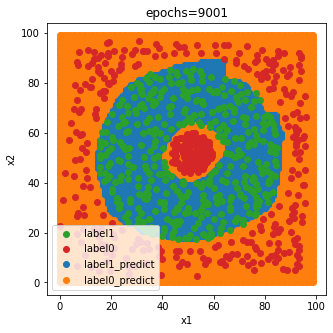

Epoch 1/500
630/630 [==============================] - 0s 28us/step - loss: 0.0191
Epoch 2/500
630/630 [==============================] - 0s 23us/step - loss: 0.0193
Epoch 3/500
630/630 [==============================] - 0s 23us/step - loss: 0.0192
Epoch 4/500
630/630 [==============================] - 0s 22us/step - loss: 0.0200
Epoch 5/500
630/630 [==============================] - 0s 22us/step - loss: 0.0188
Epoch 6/500
630/630 [==============================] - 0s 22us/step - loss: 0.0187
Epoch 7/500
630/630 [==============================] - 0s 24us/step - loss: 0.0193
Epoch 8/500
630/630 [==============================] - 0s 25us/step - loss: 0.0189
Epoch 9/500
630/630 [==============================] - 0s 24us/step - loss: 0.0195
Epoch 10/500
630/630 [==============================] - 0s 23us/step - loss: 0.0185
Epoch 11/500
630/630 [==============================] - 0s 24us/step - loss: 0.0193
Epoch 12/500
630/630 [==============================] - 0s 26us/step - loss: 0.0207
E

630/630 [==============================] - 0s 28us/step - loss: 0.0192
Epoch 99/500
630/630 [==============================] - 0s 28us/step - loss: 0.0198
Epoch 100/500
630/630 [==============================] - 0s 28us/step - loss: 0.0196
Epoch 101/500
630/630 [==============================] - 0s 27us/step - loss: 0.0223
Epoch 102/500
630/630 [==============================] - 0s 28us/step - loss: 0.0261
Epoch 103/500
630/630 [==============================] - 0s 28us/step - loss: 0.0197
Epoch 104/500
630/630 [==============================] - 0s 27us/step - loss: 0.0179
Epoch 105/500
630/630 [==============================] - 0s 26us/step - loss: 0.0182
Epoch 106/500
630/630 [==============================] - 0s 26us/step - loss: 0.0187
Epoch 107/500
630/630 [==============================] - 0s 26us/step - loss: 0.0188
Epoch 108/500
630/630 [==============================] - 0s 26us/step - loss: 0.0186
Epoch 109/500
630/630 [==============================] - 0s 27us/step - loss: 0.

630/630 [==============================] - 0s 27us/step - loss: 0.0182
Epoch 195/500
630/630 [==============================] - 0s 29us/step - loss: 0.0186
Epoch 196/500
630/630 [==============================] - 0s 35us/step - loss: 0.0193
Epoch 197/500
630/630 [==============================] - 0s 26us/step - loss: 0.0222
Epoch 198/500
630/630 [==============================] - 0s 28us/step - loss: 0.0191
Epoch 199/500
630/630 [==============================] - 0s 27us/step - loss: 0.0183
Epoch 200/500
630/630 [==============================] - 0s 27us/step - loss: 0.0183
Epoch 201/500
630/630 [==============================] - 0s 26us/step - loss: 0.0179
Epoch 202/500
630/630 [==============================] - 0s 26us/step - loss: 0.0174
Epoch 203/500
630/630 [==============================] - 0s 28us/step - loss: 0.0180
Epoch 204/500
630/630 [==============================] - 0s 32us/step - loss: 0.0176
Epoch 205/500
630/630 [==============================] - 0s 32us/step - loss: 0

630/630 [==============================] - 0s 27us/step - loss: 0.0168
Epoch 291/500
630/630 [==============================] - 0s 27us/step - loss: 0.0190
Epoch 292/500
630/630 [==============================] - 0s 25us/step - loss: 0.0214
Epoch 293/500
630/630 [==============================] - 0s 23us/step - loss: 0.0168
Epoch 294/500
630/630 [==============================] - 0s 23us/step - loss: 0.0178
Epoch 295/500
630/630 [==============================] - 0s 23us/step - loss: 0.0179
Epoch 296/500
630/630 [==============================] - 0s 23us/step - loss: 0.0168
Epoch 297/500
630/630 [==============================] - 0s 24us/step - loss: 0.0177
Epoch 298/500
630/630 [==============================] - 0s 27us/step - loss: 0.0172
Epoch 299/500
630/630 [==============================] - 0s 24us/step - loss: 0.0165
Epoch 300/500
630/630 [==============================] - 0s 30us/step - loss: 0.0170
Epoch 301/500
630/630 [==============================] - 0s 41us/step - loss: 0

630/630 [==============================] - 0s 22us/step - loss: 0.0167
Epoch 387/500
630/630 [==============================] - 0s 22us/step - loss: 0.0171
Epoch 388/500
630/630 [==============================] - 0s 22us/step - loss: 0.0178
Epoch 389/500
630/630 [==============================] - 0s 23us/step - loss: 0.0171
Epoch 390/500
630/630 [==============================] - 0s 23us/step - loss: 0.0176
Epoch 391/500
630/630 [==============================] - 0s 24us/step - loss: 0.0166
Epoch 392/500
630/630 [==============================] - 0s 25us/step - loss: 0.0164
Epoch 393/500
630/630 [==============================] - 0s 24us/step - loss: 0.0166
Epoch 394/500
630/630 [==============================] - 0s 24us/step - loss: 0.0175
Epoch 395/500
630/630 [==============================] - 0s 24us/step - loss: 0.0171
Epoch 396/500
630/630 [==============================] - 0s 23us/step - loss: 0.0164
Epoch 397/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 24us/step - loss: 0.0172
Epoch 483/500
630/630 [==============================] - 0s 24us/step - loss: 0.0162
Epoch 484/500
630/630 [==============================] - 0s 23us/step - loss: 0.0161
Epoch 485/500
630/630 [==============================] - 0s 23us/step - loss: 0.0164
Epoch 486/500
630/630 [==============================] - 0s 23us/step - loss: 0.0172
Epoch 487/500
630/630 [==============================] - 0s 23us/step - loss: 0.0172
Epoch 488/500
630/630 [==============================] - 0s 23us/step - loss: 0.0181
Epoch 489/500
630/630 [==============================] - 0s 23us/step - loss: 0.0159
Epoch 490/500
630/630 [==============================] - 0s 22us/step - loss: 0.0157
Epoch 491/500
630/630 [==============================] - 0s 23us/step - loss: 0.0180
Epoch 492/500
630/630 [==============================] - 0s 23us/step - loss: 0.0190
Epoch 493/500
630/630 [==============================] - 0s 23us/step - loss: 0

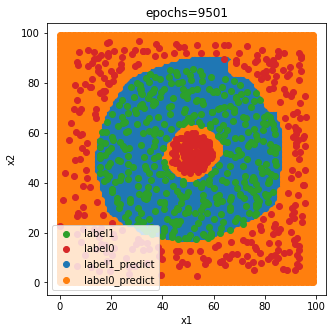

Epoch 1/500
630/630 [==============================] - 0s 27us/step - loss: 0.0170
Epoch 2/500
630/630 [==============================] - 0s 23us/step - loss: 0.0201
Epoch 3/500
630/630 [==============================] - 0s 23us/step - loss: 0.0197
Epoch 4/500
630/630 [==============================] - 0s 24us/step - loss: 0.0182
Epoch 5/500
630/630 [==============================] - 0s 24us/step - loss: 0.0178
Epoch 6/500
630/630 [==============================] - 0s 23us/step - loss: 0.0159
Epoch 7/500
630/630 [==============================] - 0s 23us/step - loss: 0.0156
Epoch 8/500
630/630 [==============================] - 0s 23us/step - loss: 0.0166
Epoch 9/500
630/630 [==============================] - 0s 23us/step - loss: 0.0163
Epoch 10/500
630/630 [==============================] - 0s 23us/step - loss: 0.0151
Epoch 11/500
630/630 [==============================] - 0s 22us/step - loss: 0.0150
Epoch 12/500
630/630 [==============================] - 0s 22us/step - loss: 0.0156
E

630/630 [==============================] - 0s 23us/step - loss: 0.0165
Epoch 99/500
630/630 [==============================] - 0s 22us/step - loss: 0.0146
Epoch 100/500
630/630 [==============================] - 0s 23us/step - loss: 0.0144
Epoch 101/500
630/630 [==============================] - 0s 22us/step - loss: 0.0154
Epoch 102/500
630/630 [==============================] - 0s 22us/step - loss: 0.0164
Epoch 103/500
630/630 [==============================] - 0s 23us/step - loss: 0.0170
Epoch 104/500
630/630 [==============================] - 0s 23us/step - loss: 0.0156
Epoch 105/500
630/630 [==============================] - 0s 24us/step - loss: 0.0153
Epoch 106/500
630/630 [==============================] - 0s 24us/step - loss: 0.0148
Epoch 107/500
630/630 [==============================] - 0s 23us/step - loss: 0.0163
Epoch 108/500
630/630 [==============================] - 0s 24us/step - loss: 0.0158
Epoch 109/500
630/630 [==============================] - 0s 23us/step - loss: 0.

630/630 [==============================] - 0s 25us/step - loss: 0.0146
Epoch 195/500
630/630 [==============================] - 0s 25us/step - loss: 0.0145
Epoch 196/500
630/630 [==============================] - 0s 25us/step - loss: 0.0173
Epoch 197/500
630/630 [==============================] - 0s 24us/step - loss: 0.0185
Epoch 198/500
630/630 [==============================] - 0s 25us/step - loss: 0.0171
Epoch 199/500
630/630 [==============================] - 0s 24us/step - loss: 0.0150
Epoch 200/500
630/630 [==============================] - 0s 24us/step - loss: 0.0157
Epoch 201/500
630/630 [==============================] - 0s 24us/step - loss: 0.0150
Epoch 202/500
630/630 [==============================] - 0s 24us/step - loss: 0.0145
Epoch 203/500
630/630 [==============================] - 0s 24us/step - loss: 0.0143
Epoch 204/500
630/630 [==============================] - 0s 23us/step - loss: 0.0148
Epoch 205/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 25us/step - loss: 0.0140
Epoch 291/500
630/630 [==============================] - 0s 23us/step - loss: 0.0149
Epoch 292/500
630/630 [==============================] - 0s 23us/step - loss: 0.0164
Epoch 293/500
630/630 [==============================] - 0s 23us/step - loss: 0.0146
Epoch 294/500
630/630 [==============================] - 0s 23us/step - loss: 0.0148
Epoch 295/500
630/630 [==============================] - 0s 23us/step - loss: 0.0149
Epoch 296/500
630/630 [==============================] - 0s 24us/step - loss: 0.0142
Epoch 297/500
630/630 [==============================] - 0s 23us/step - loss: 0.0158
Epoch 298/500
630/630 [==============================] - 0s 23us/step - loss: 0.0146
Epoch 299/500
630/630 [==============================] - 0s 23us/step - loss: 0.0140
Epoch 300/500
630/630 [==============================] - 0s 25us/step - loss: 0.0172
Epoch 301/500
630/630 [==============================] - 0s 24us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.0160
Epoch 387/500
630/630 [==============================] - 0s 23us/step - loss: 0.0140
Epoch 388/500
630/630 [==============================] - 0s 24us/step - loss: 0.0154
Epoch 389/500
630/630 [==============================] - 0s 24us/step - loss: 0.0142
Epoch 390/500
630/630 [==============================] - 0s 24us/step - loss: 0.0139
Epoch 391/500
630/630 [==============================] - 0s 23us/step - loss: 0.0146
Epoch 392/500
630/630 [==============================] - 0s 23us/step - loss: 0.0131
Epoch 393/500
630/630 [==============================] - 0s 23us/step - loss: 0.0138
Epoch 394/500
630/630 [==============================] - 0s 23us/step - loss: 0.0149
Epoch 395/500
630/630 [==============================] - 0s 23us/step - loss: 0.0141
Epoch 396/500
630/630 [==============================] - 0s 23us/step - loss: 0.0137
Epoch 397/500
630/630 [==============================] - 0s 23us/step - loss: 0

630/630 [==============================] - 0s 23us/step - loss: 0.0139
Epoch 483/500
630/630 [==============================] - 0s 23us/step - loss: 0.0152
Epoch 484/500
630/630 [==============================] - 0s 22us/step - loss: 0.0136
Epoch 485/500
630/630 [==============================] - 0s 22us/step - loss: 0.0146
Epoch 486/500
630/630 [==============================] - 0s 22us/step - loss: 0.0133
Epoch 487/500
630/630 [==============================] - 0s 22us/step - loss: 0.0132
Epoch 488/500
630/630 [==============================] - 0s 22us/step - loss: 0.0140
Epoch 489/500
630/630 [==============================] - 0s 22us/step - loss: 0.0138
Epoch 490/500
630/630 [==============================] - 0s 22us/step - loss: 0.0183
Epoch 491/500
630/630 [==============================] - 0s 22us/step - loss: 0.0168
Epoch 492/500
630/630 [==============================] - 0s 22us/step - loss: 0.0193
Epoch 493/500
630/630 [==============================] - 0s 22us/step - loss: 0

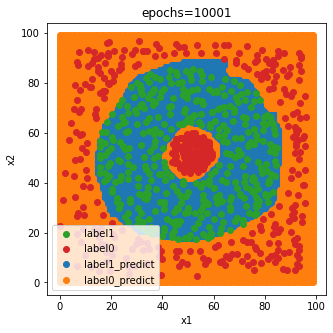

In [69]:
#逐步迭代及结果可视化
accuracy_train = []
accuracy_test = []
for i in range(0,21):
    #train the model
    if i == 0:
        mlp.fit(x_train,y_train,epochs=1)
    else:
        mlp.fit(x_train,y_train,epochs=500)
    #make prediction and calculate the accuracy
    y_train_predict = mlp.predict_classes(x_train)
    accuracy_train_i = accuracy_score(y_train,y_train_predict)
    #make prediction based on the test data
    y_test_predict = mlp.predict_classes(x_test)
    accuracy_test_i = accuracy_score(y_test,y_test_predict)  
    accuracy_train.append(accuracy_train_i)
    accuracy_test.append(accuracy_test_i)
    
    #generate new data for plot
    xx, yy = np.meshgrid(np.arange(0,100,1),np.arange(0,100,1))
    x_range = np.c_[xx.ravel(),yy.ravel()]
    y_range_predict = mlp.predict_classes(x_range)
    #format the output
    y_range_predict_form = pd.Series(i[0] for i in y_range_predict)

    fig_i = plt.figure(figsize=(5,5))
    label1_predict=plt.scatter(x_range[:,0][y_range_predict_form==1],x_range[:,1][y_range_predict_form==1])
    label0_predict=plt.scatter(x_range[:,0][y_range_predict_form==0],x_range[:,1][y_range_predict_form==0])
    label1=plt.scatter(data.loc[:,'x1'][y==1],data.loc[:,'x2'][y==1])
    label0=plt.scatter(data.loc[:,'x1'][y==0],data.loc[:,'x2'][y==0])
    plt.legend((label1,label0,label1_predict,label0_predict),('label1','label0','label1_predict','label0_predict'))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('epochs={}'.format(1+i*500))
    plt.show()
    fig_i.savefig('2d_output/{}.png'.format(i),dpi=500,bbox_inches = 'tight')

In [70]:
n = [1+i*500 for i in range(0,21)]
print(n)

[1, 501, 1001, 1501, 2001, 2501, 3001, 3501, 4001, 4501, 5001, 5501, 6001, 6501, 7001, 7501, 8001, 8501, 9001, 9501, 10001]


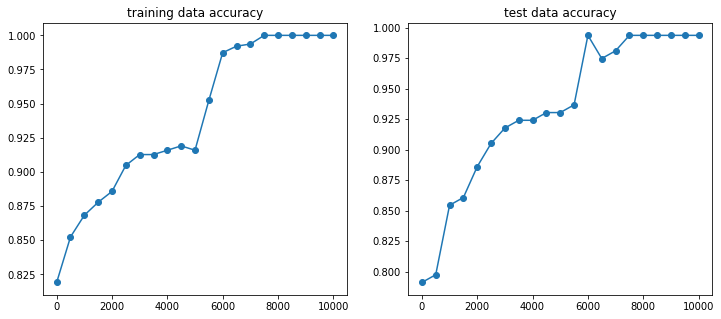

In [71]:
fig3 = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(n,accuracy_train,marker='o')
plt.title('training data accuracy')

plt.subplot(122)
plt.plot(n,accuracy_test,marker='o')
plt.title('test data accuracy')
plt.show()

In [72]:
print(accuracy_test)

[0.7911392405063291, 0.7974683544303798, 0.8544303797468354, 0.8607594936708861, 0.8860759493670886, 0.9050632911392406, 0.9177215189873418, 0.9240506329113924, 0.9240506329113924, 0.930379746835443, 0.930379746835443, 0.9367088607594937, 0.9936708860759493, 0.9746835443037974, 0.9810126582278481, 0.9936708860759493, 0.9936708860759493, 0.9936708860759493, 0.9936708860759493, 0.9936708860759493, 0.9936708860759493]


MLP快速搭建非线性二分类模型实战summary：

1、在不增加高阶特征项的情况下，通过建立mlp模型，实现了非线性二分类任务；
2、掌握了mlp模型的建立、配置与训练方法，完成了数据分离、模型训练、预测与评估任务；
3、熟悉了mlp分类的预测数据格式，并实现格式转换；
4、通过修改迭代次数，实现了mlp训练过程结果的可视化，帮助更好地理解模型训练过程、
核心算法参考链接：https://keras-cn.readthedocs.io/en/latest/#30skeras